In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from collections import defaultdict

from IPython.display import HTML
from IPython.display import display_html

%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
from utils.utils import *

In [2]:
CLUSTERS = ["cosmos08", "cosmos09", "cosmos14", "cosmos15"]
#CLUSTERS = ["cosmos08", "cosmos09", "cosmos14"]
#CLUSTERS = ["cosmos09", "cosmos15"]

FN_TMP = "../data/{CLUSTER}/op_df.csv"
FN_TMP2 = "../data/{CLUSTER}/expr_df.csv"
#DEDUPFN = FN.replace(".ss.csv", "-dedup.ss.csv")
#AUGMENTED_FN = FN.replace(".ss.csv", "-augmented.ss.csv")

INP_FIELD = "NormInputHashCode"
FILTER_FIELD = "FilterExpr"

#WKS = ["job", "tpcds", "tpch", "stack"]
WKS = ["job", "tpcds1", "tpch1", "stack", "ceb"]

WORKLOADS = {}
WORKLOADS["stack"] = "../data/stack/dfs"
WORKLOADS["tpcds"] = "../data/tpcds/all/dfs/"
WORKLOADS["tpcds1"] = "../data/tpcds1/all/dfs/"
WORKLOADS["job"] = "../data/job/all_job/sqls/dfs/"
WORKLOADS["tpch"] = "../data/tpch/all/dfs"
WORKLOADS["tpch1"] = "../data/tpch1/all/dfs"
WORKLOADS["ceb"] = "../data/ceb-all/sqls/dfs/"

EXPRDF_FIELDS0 = ['jobid', INP_FIELD, 'unique_filter_cols',
       'discrete_ops', 'cont_ops', 'like_ops', 'num_unique_ops', 'num_ops',
       'num_discrete_consts', 'num_likes', 'like_lens', 
        #'workload', 
        'db', 'cluster', 'StageName',
        'InputCardinality', 'RowCount', 'Selectivity']

EXPRDF_FIELDS = ['jobid', 'input', 'unique_filter_cols',
       'discrete_ops', 'cont_ops', 'like_ops', 'num_unique_ops', 'num_ops',
       'num_discrete_consts', 'num_likes', 'like_lens', 
        'workload', 
        'db', 'cluster', "StageName",
        'InputCardinality', 'RowCount', 'Selectivity']

OPDF_FIELDS0 = ['op', 'dtype', 'optype', 'constant', 'input', 'column', 'opstring',
       'jobid', 'exprhash', 'StageName',
       #'workload', 
        'db', 'cluster']

OPDF_FIELDS = ['op', 'dtype', 'optype', 'constant', 'input', 'column', 'opstring',
       'jobid', 'exprhash', 'StageName',
       'workload', 'cluster',
        'db']

#DSCOLORS = ["blue", "red", "green", "black"]
DSCOLORS = {}
DSCOLORS["tpcds"] = "red"
DSCOLORS["tpcds1"] = "red"
DSCOLORS["tpch"] = "purple"
DSCOLORS["tpch1"] = "purple"

DSCOLORS["job"] = "green"
DSCOLORS["ceb"] = "orange"
DSCOLORS["stack"] = "blue"
DSCOLORS["cosmos"] = "grey"

In [3]:
wk_opdfs = []
wk_exprdfs = []

for wk in WKS:
    dirname = WORKLOADS[wk]
    opfn = os.path.join(dirname, "op_df.csv")
    exprfn = os.path.join(dirname, "expr_df.csv")
    wk_opdfs.append(pd.read_csv(opfn))
    wk_exprdfs.append(pd.read_csv(exprfn))

In [4]:
wopdf = pd.concat(wk_opdfs)
wedf = pd.concat(wk_exprdfs)

In [5]:
wopdf["cluster"] = wopdf["db"]
wopdf["StageName"] = "SV1_"
wopdf = wopdf[OPDF_FIELDS]

In [6]:
wedf["cluster"] = wedf["db"]
wedf["StageName"] = "SV1_"
wedf = wedf[EXPRDF_FIELDS]

In [7]:
print(set(wedf["workload"]))

{'job', 'stack', 'tpch1', 'ceb', 'tpcds1'}


In [8]:
wedf = wedf[wedf.RowCount != -1]
wedf.groupby(["db", "input"])["Selectivity"].describe()

count      mean           std           min  \
db     input                                                                  
ceb    ci                       147.0  0.941447  1.491627e-01  9.380774e-07   
       cn                       305.0  0.185125  3.190863e-01  8.510747e-06   
       ct                       189.0  0.537037  2.666353e-01  2.500000e-01   
       it                      4731.0  0.011218  3.545740e-02  8.849558e-03   
       k                        247.0  0.327993  4.703740e-01  7.453231e-06   
       kt                      3120.0  0.465293  2.162023e-01  1.428571e-01   
       mi                      3717.0  0.085844  1.001571e-01  5.369954e-07   
       mii                      376.0  0.491432  3.890147e-01  1.739085e-06   
       n                       2195.0  0.631084  4.265858e-01  4.118765e-07   
       pi                       226.0  0.226874  2.547403e-01  1.373998e-04   
       rt                      3000.0  0.267639  2.214726e-01  8.333333e-02   
       t                       2792.0  0.636101  3.633361e-01  9.493025e-07   
job    an                         3.0  1.000000  0.000000e+00  1.000000e+00   
       cct                       39.0  0.346154  1.475166e-01  2.500000e-01   
       chn                        8.0  0.068844  7.358433e-02  7.642187e-07   
       ci                        30.0  0.066369  2.985932e-02  2.138022e-03   
       cn                        67.0  0.490686  2.942934e-01  7.234110e-06   
       ct                        24.0  0.302083  1.470575e-01  2.500000e-01   
       it                        96.0  0.008850  1.743830e-18  8.849558e-03   
       k                         69.0  0.000042  6.010642e-05  7.453231e-06   
       kt                        29.0  0.206897  9.798410e-02  1.428571e-01   
       lt                        14.0  0.107143  4.055811e-02  5.555556e-02   
       mc                        22.0  0.256280  2.898031e-01  1.304343e-03   
       mi                        50.0  0.051692  4.754061e-02  2.892472e-04   
       mi_idx                    21.0  0.716232  3.871803e-01  1.355269e-02   
       n                         40.0  0.302416  4.110388e-01  1.151800e-06   
       pi                         2.0  0.000052  0.000000e+00  5.179930e-05   
       rt                        19.0  0.083333  0.000000e+00  8.333333e-02   
       t                         65.0  0.623227  4.332645e-01  1.898452e-06   
tpcds1 call_center                1.0  1.000000           NaN  1.000000e+00   
       catalog_returns            1.0  0.008447           NaN  8.447458e-03   
       catalog_sales              2.0  0.192967  2.728959e-01  0.000000e+00   
       customer                   2.0  0.480425  8.690342e-03  4.742800e-01   
       customer_address          17.0  0.111820  1.417305e-01  0.000000e+00   
       customer_demographics      8.0  0.042857  6.743964e-02  0.000000e+00   
       date_dim                  90.0  0.007243  1.635304e-02  0.000000e+00   
       household_demographics    10.0  0.065000  6.733462e-02  0.000000e+00   
       income_band                1.0  0.200000           NaN  2.000000e-01   
       inventory                  2.0  0.380546  0.000000e+00  3.805458e-01   
       item                      26.0  0.054068  9.440864e-02  0.000000e+00   
       promotion                  4.0  0.731667  4.877879e-01  0.000000e+00   
       reason                     2.0  0.014286  2.020305e-02  0.000000e+00   
       ship_mode                  1.0  0.100000           NaN  1.000000e-01   
       store                     14.0  0.648810  4.772367e-01  0.000000e+00   
       store_returns              1.0  0.001763           NaN  1.763392e-03   
       store_sales                5.0  0.079529  1.124639e-01  0.000000e+00   
       time_dim                   5.0  0.070836  1.470242e-01  0.000000e+00   
       web_page                   1.0  0.016667           NaN  1.666667e-02   
       web_returns                1.0  0.008807           NaN  8.806767e-03   
   

In [9]:
#set(wedf["RowCount"])

In [10]:
opdfs = []
exprdfs = []

for cluster in CLUSTERS:
    print(cluster)
    fn = FN_TMP.format(CLUSTER=cluster)
    opdfs.append(pd.read_csv(fn, usecols = OPDF_FIELDS0))
    
    fn2 = FN_TMP2.format(CLUSTER=cluster)
    exprdfs.append(pd.read_csv(fn2, usecols = EXPRDF_FIELDS0))

cosmos08


/home/pari/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


cosmos09
cosmos14
cosmos15


In [11]:
opdf = pd.concat(opdfs)
exprdf = pd.concat(exprdfs)

In [12]:
print(set(exprdf["cluster"]))

{'cosmos14', 'cosmos09', 'cosmos08', 'cosmos15'}


In [13]:
#exprdf.groupby("cluster")["Selectivity"].describe(percentiles=[0.25,0.75, 0.90, 0.95, 0.99])

In [14]:
exprdf["workload"] = "cosmos"
exprdf = exprdf.rename(columns={INP_FIELD:"input"})
exprdf = exprdf[EXPRDF_FIELDS]

In [15]:
print(len(set(exprdf["input"])))
print(len(set(exprdf["db"])))

66169
45635


In [16]:
exprdf = pd.concat([exprdf, wedf], ignore_index=True)

In [17]:
exprdf["Stage1"] = exprdf.apply(lambda x: "SV1_" in str(x["StageName"]) ,axis=1)
exprdf1 = exprdf[exprdf["Stage1"] == True]

In [18]:
print(len(set(exprdf1["input"])))
print(len(set(exprdf1["db"])))

18192
16031


In [19]:
opdf["workload"] = "cosmos"
opdf["Stage1"] = opdf.apply(lambda x: "SV1_" in str(x["StageName"]) ,axis=1)
opdf1 = opdf[opdf["Stage1"] == True]
opdf = opdf[OPDF_FIELDS]
opdf1 = opdf1[OPDF_FIELDS]

In [20]:
opdf = pd.concat([opdf, wopdf])

In [21]:
opdf1 = pd.concat([opdf1, wopdf])

In [22]:
print(len(opdf), len(exprdf))

35102647 7774865


In [23]:
pd.options.display.max_colwidth = 1000
pd.set_option('display.max_columns', 100)

In [24]:
opdf.head(5)

op dtype optype constant       input                        column  \
0   =  bool      =    false  -915329154            -915329154IsFraud:   
1   =   num      =        0  -915329154            -915329154DupAdId:   
2   =   num      =        5  -915329154    -915329154AdDisplayTypeId:   
3   =   num      =        3  -915329154         -915329154DomainType:   
4  !=   num     !=       11  -915329154  -915329154CampaignSubTypeId:   

  opstring                                 jobid  \
0        =  57e6ae0e-75b4-5289-b4ab-b8b622a56e51   
1        =  57e6ae0e-75b4-5289-b4ab-b8b622a56e51   
2        =  57e6ae0e-75b4-5289-b4ab-b8b622a56e51   
3        =  57e6ae0e-75b4-5289-b4ab-b8b622a56e51   
4       !=  57e6ae0e-75b4-5289-b4ab-b8b622a56e51   

                                         exprhash              StageName  \
0  5064756342040975012009299131817552574291618420  SV1_Extract_Partition   
1  5064756342040975012009299131817552574291618420  SV1_Extract_Partition   
2  5064756342040975012009299131817552574291618420  SV1_Extract_Partition   
3  5064756342040975012009299131817552574291618420  SV1_Extract_Partition   
4  5064756342040975012009299131817552574291618420  SV1_Extract_Partition   

  workload   cluster                db  
0   cosmos  cosmos08  cosmos08-4103124  
1   cosmos  cosmos08  cosmos08-4103124  
2   cosmos  cosmos08  cosmos08-4103124  
3   cosmos  cosmos08  cosmos08-4103124  
4   cosmos  cosmos08  cosmos08-4103124

# Discrete vs Continuous etc

In [25]:
dbcounts = exprdf.groupby("input").count()["jobid"].reset_index().sort_values(by="jobid", ascending=False)
#dbcounts["jobid"].describe(percentiles=[0.9,0.99])
dbcounts1 = exprdf1.groupby("input").count()["jobid"].reset_index().sort_values(by="jobid", ascending=False)
dbcounts["jobid"].describe(percentiles=[0.9,0.99])

count    6.621400e+04
mean     1.174203e+02
std      7.150725e+03
min      1.000000e+00
50%      2.000000e+00
90%      2.500000e+01
99%      6.970000e+02
max      1.284171e+06
Name: jobid, dtype: float64

In [26]:
seldbs = dbcounts[dbcounts["jobid"] >= 10]["input"].values
seldbs = list(seldbs) + WKS

seldbs1 = dbcounts1[dbcounts1["jobid"] >= 10]["input"].values
seldbs1 = list(seldbs1) + WKS

dbmeans = exprdf.groupby(["input", "cluster", "workload"])[["cont_ops", "discrete_ops", "like_ops"]].mean().reset_index()
dbmeans = dbmeans[dbmeans.input.isin(seldbs)]

dbmeans1 = exprdf1.groupby(["input", "cluster", "workload"])[["cont_ops", "discrete_ops", "like_ops"]].mean().reset_index()
dbmeans1 = dbmeans[dbmeans.input.isin(seldbs1)]

In [27]:
tmp = exprdf1[exprdf1.input.isin(seldbs1)]
print(len(set(tmp["input"])))
print(len(set(tmp["db"])))
print(len(tmp))

1219
985
133908


/home/pari/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


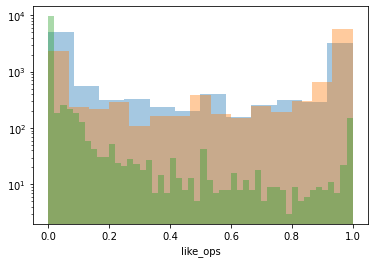

In [37]:
sns.distplot(dbmeans["cont_ops"], kde=False)
sns.distplot(dbmeans["discrete_ops"], kde=False)
sns.distplot(dbmeans["like_ops"], kde=False)
plt.yscale("log")

In [38]:
wedf.groupby(["workload","input"])[["cont_ops", "discrete_ops", "like_ops"]].mean()

cont_ops  discrete_ops  like_ops
workload input                                                   
ceb      ci                      0.000000      1.000000  0.000000
         cn                      0.000000      0.619672  0.380328
         ct                      0.000000      1.000000  0.000000
         it                      0.000000      1.000000  0.000000
         k                       0.000000      1.000000  0.000000
         kt                      0.000000      0.954487  0.045513
         mi                      0.000000      0.842884  0.157116
         mii                     1.000000      0.000000  0.000000
         n                       0.000000      0.883827  0.116173
         pi                      0.000000      0.000000  1.000000
         rt                      0.000000      1.000000  0.000000
         t                       0.973138      0.041189  0.026862
job      an                      0.000000      0.000000  1.000000
         cct                     0.000000      0.820513  0.179487
         chn                     0.000000      0.250000  0.750000
         ci                      0.000000      0.900000  0.100000
         cn                      0.000000      0.955224  0.179104
         ct                      0.000000      1.000000  0.000000
         it                      0.000000      1.000000  0.000000
         k                       0.000000      0.913043  0.086957
         kt                      0.000000      1.000000  0.000000
         lt                      0.000000      0.357143  0.642857
         mc                      0.000000      0.000000  1.000000
         mi                      0.000000      0.700000  0.300000
         mi_idx                  1.000000      0.000000  0.000000
         n                       0.000000      0.675000  0.700000
         pi                      0.000000      1.000000  0.000000
         rt                      0.000000      1.000000  0.000000
         t                       0.861538      0.107692  0.169231
tpcds1   call_center             0.000000      1.000000  0.000000
         catalog_returns         1.000000      0.000000  0.000000
         catalog_sales           1.000000      0.000000  0.000000
         customer                0.000000      1.000000  0.000000
         customer_address        0.000000      1.000000  0.000000
         customer_demographics   0.000000      1.000000  0.000000
         date_dim                0.322222      0.788889  0.000000
         household_demographics  0.400000      0.900000  0.100000
         income_band             1.000000      0.000000  0.000000
         inventory               1.000000      0.000000  0.000000
         item                    0.269231      0.884615  0.000000
         promotion               0.000000      1.000000  0.000000
         reason                  0.000000      1.000000  0.000000
         ship_mode               0.000000      1.000000  0.000000
         store                   0.071429      0.928571  0.000000
         store_returns           1.000000      0.000000  0.000000
         store_sales             0.800000      0.200000  0.000000
         time_dim                0.800000      0.600000  0.000000
         web_page                1.000000      0.000000  0.000000
         web_returns             1.000000      0.000000  0.000000
         web_sales               1.000000      0.000000  0.000000
         web_site                0.000000      1.000000  0.000000
tpch1    customer                0.000000      1.000000  0.000000
         lineitem                0.900000      0.300000  0.000000
         nation                  0.000000      1.000000  0.000000
         orders                  0.833333      0.166667  0.000000
         part                    0.166667      0.666667  0.500000
         region                  0.000000      1.000000  0.000000

/home/pari/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


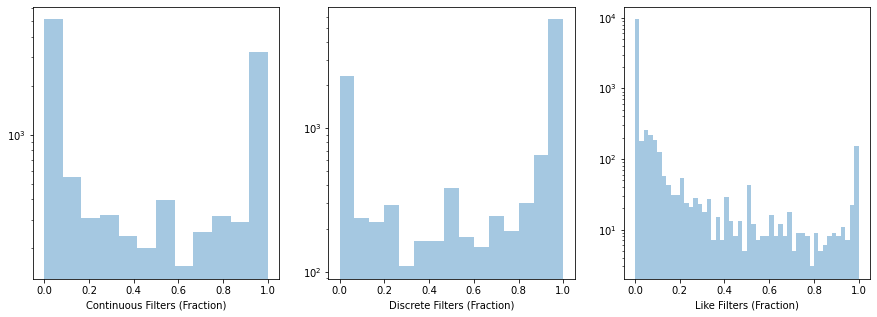

In [39]:
fig,axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax = axs[0]
sns.distplot(dbmeans["cont_ops"], kde=False, ax=ax)
ax.set_yscale("log")
ax.set_xlabel("Continuous Filters (Fraction)")

ax = axs[1]
sns.distplot(dbmeans["discrete_ops"], kde=False, ax=ax)
ax.set_yscale("log")
ax.set_xlabel("Discrete Filters (Fraction)")

ax = axs[2]
sns.distplot(dbmeans["like_ops"], kde=False)
ax.set_yscale("log")
ax.set_xlabel("Like Filters (Fraction)")

plt.savefig("Filter-Type-Distributions.png")

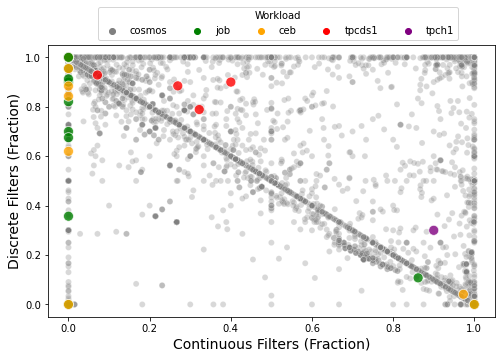

In [43]:
means1 = dbmeans[dbmeans.workload == "cosmos"]
means2 = dbmeans[dbmeans.workload != "cosmos"]
fig,ax = plt.subplots(nrows=1,ncols=1, figsize=(8,5))

sns.scatterplot(data=means1, x="cont_ops", y="discrete_ops", alpha=0.3, hue="workload", palette=["grey"])
sns.scatterplot(data=means2, x="cont_ops", y="discrete_ops", alpha=0.8, hue="workload", s=100, palette=DSCOLORS)

ax.legend(title="Workload", bbox_to_anchor=(0.1, 1.00), ncol=5,
         frameon = True, fontsize=10)
ax.set_ylabel("Discrete Filters (Fraction)", fontsize=14)
ax.set_xlabel("Continuous Filters (Fraction)", fontsize=14)

plt.savefig("Discrete-Continuous.png", dpi=200)
plt.show()

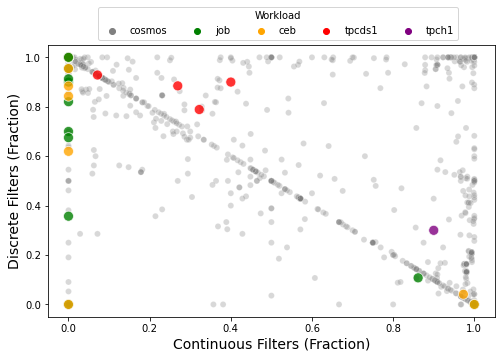

In [65]:
means1 = dbmeans1[dbmeans1.workload == "cosmos"]
means2 = dbmeans1[dbmeans1.workload != "cosmos"]
fig,ax = plt.subplots(nrows=1,ncols=1, figsize=(8,5))

sns.scatterplot(data=means1, x="cont_ops", y="discrete_ops", alpha=0.3, hue="workload", palette=["grey"])
sns.scatterplot(data=means2, x="cont_ops", y="discrete_ops", alpha=0.8, hue="workload", s=100, palette=DSCOLORS)

ax.legend(title="Workload", bbox_to_anchor=(0.1, 1.00), ncol=5,
         frameon = True, fontsize=10)
ax.set_ylabel("Discrete Filters (Fraction)", fontsize=14)
ax.set_xlabel("Continuous Filters (Fraction)", fontsize=14)

plt.savefig("Discrete-Continuous.png", dpi=200)
plt.show()

/tmp/ipykernel_734666/2116888413.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  means1 = dbmeans1[dbmeans.workload == "cosmos"]
/tmp/ipykernel_734666/2116888413.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  means2 = dbmeans1[dbmeans.workload != "cosmos"]


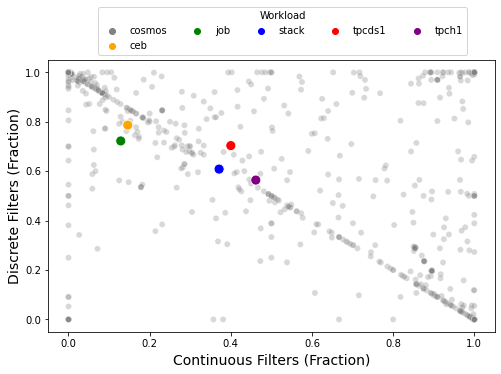

In [231]:
means1 = dbmeans1[dbmeans.workload == "cosmos"]
means2 = dbmeans1[dbmeans.workload != "cosmos"]
fig,ax = plt.subplots(nrows=1,ncols=1, figsize=(8,5))

sns.scatterplot(data=means1, x="cont_ops", y="discrete_ops", alpha=0.3, hue="workload", palette=["grey"])
sns.scatterplot(data=means2, x="cont_ops", y="discrete_ops", alpha=1.0, hue="workload", s=100, palette=DSCOLORS)

ax.legend(title="Workload", bbox_to_anchor=(0.1, 1.00), ncol=5,
         frameon = True, fontsize=10)
ax.set_ylabel("Discrete Filters (Fraction)", fontsize=14)
ax.set_xlabel("Continuous Filters (Fraction)", fontsize=14)

plt.savefig("Discrete-Continuous.png", dpi=200)
plt.show()

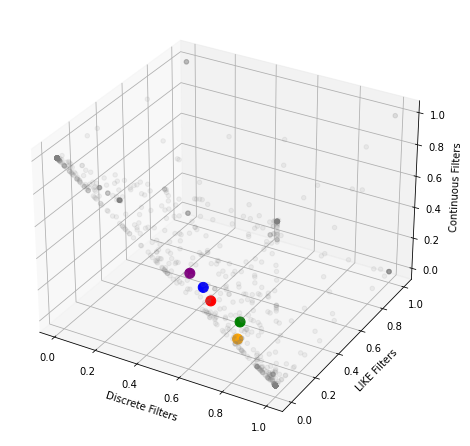

In [232]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap


x = means1["discrete_ops"]
y = means1["like_ops"]
z = means1["cont_ops"]

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# plot
sc = ax.scatter(x, y, z, s=20, marker='o', color="grey", alpha=0.1)

x2 = means2["discrete_ops"]
y2 = means2["like_ops"]
z2 = means2["cont_ops"]

cols = []
for db in means2["db"].values:
    cols.append(DSCOLORS[db])

sc = ax.scatter(x2, y2, z2, s=100, marker='o', color=cols, alpha=1.0)

#for wk in set(means2["workload"]):

ax.set_zlabel('Continuous Filters')
ax.set_xlabel('Discrete Filters')
ax.set_ylabel('LIKE Filters')

# legend
#plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
#plt.savefig("scatter_hue", bbox_inches='tight')

plt.savefig("Discrete-Continuous-Like.png", dpi=200)

# Number of discrete constants

In [260]:
opdf = opdf[~opdf.constant.isna()]
opdf1 = opdf1[~opdf1.constant.isna()]

In [261]:
print(set(opdf["cluster"]))

{'cosmos15', 'cosmos14', 'tpch1', 'cosmos09', 'job', 'cosmos08', 'stack', 'tpcds1', 'ceb'}


In [262]:
discdf = opdf[opdf.op.isin(["!=", "="])]
discdf = discdf[~discdf.constant.str.contains("null")]
discdf1 = opdf1[opdf1.op.isin(["!=", "="])]
discdf1 = discdf1[~discdf1.constant.str.contains("null")]

In [263]:
print(len(set(discdf["column"])))
print(len(set(discdf1["column"])))

80766
19497


In [272]:
cdf = discdf.groupby(["column", "db", "workload", "cluster"])["constant"].nunique().reset_index()
cdf1 = discdf1.groupby(["column", "db", "workload", "cluster"])["constant"].nunique().reset_index()

In [268]:
cdf.sort_values(by="constant", ascending=False).head(50)

column                 db workload   cluster  \
207217                         Id              stack    stack     stack   
182125        530496534tenant_id:   cosmos14-2374532   cosmos  cosmos14   
100893       1042378059tenant_id:   cosmos14-2374532   cosmos  cosmos14   
181820        530496534tenant_id:  cosmos14-19148750   cosmos  cosmos14   
100648       1042378059tenant_id:  cosmos14-19148750   cosmos  cosmos14   
182450        530496534tenant_id:    cosmos14-292405   cosmos  cosmos14   
101179       1042378059tenant_id:    cosmos14-292405   cosmos  cosmos14   
181581        530496534tenant_id:  cosmos14-15912462   cosmos  cosmos14   
182184        530496534tenant_id:  cosmos14-24648735   cosmos  cosmos14   
100456       1042378059tenant_id:  cosmos14-15912462   cosmos  cosmos14   
100941       1042378059tenant_id:  cosmos14-24648735   cosmos  cosmos14   
181532        530496534tenant_id:  cosmos14-15123561   cosmos  cosmos14   
182985        530496534tenant_id:   cosmos14-7924924   cosmos  cosmos14   
207328                         id              stack    stack     stack   
207402                      title                ceb      ceb       ceb   
101637       1042378059tenant_id:   cosmos14-7924924   cosmos  cosmos14   
100407       1042378059tenant_id:  cosmos14-15123561   cosmos  cosmos14   
182293        530496534tenant_id:  cosmos14-26511615   cosmos  cosmos14   
181316        530496534tenant_id:  cosmos14-11432331   cosmos  cosmos14   
182452        530496534tenant_id:  cosmos14-29246815   cosmos  cosmos14   
101022       1042378059tenant_id:  cosmos14-26511615   cosmos  cosmos14   
181387        530496534tenant_id:  cosmos14-12634741   cosmos  cosmos14   
178071        500972343tenant_id:   cosmos14-2374532   cosmos  cosmos14   
207251                    TagName              stack    stack     stack   
181406        530496534tenant_id:  cosmos14-12816431   cosmos  cosmos14   
99114        1024311344tenant_id:   cosmos14-2374532   cosmos  cosmos14   
181448        530496534tenant_id:   cosmos14-1344548   cosmos  cosmos14   
207331                    keyword                ceb      ceb       ceb   
182330        530496534tenant_id:   cosmos14-2711969   cosmos  cosmos14   
207329                       info                ceb      ceb       ceb   
99016        1024311344tenant_id:  cosmos14-19148750   cosmos  cosmos14   
100289       1042378059tenant_id:  cosmos14-12634741   cosmos  cosmos14   
100222       1042378059tenant_id:  cosmos14-11432331   cosmos  cosmos14   
101180       1042378059tenant_id:  cosmos14-29246815   cosmos  cosmos14   
99200        1024311344tenant_id:    cosmos14-292405   cosmos  cosmos14   
112380  1218533382SnapshotDateId:  cosmos15-13254148   cosmos  cosmos15   
181660        530496534tenant_id:   cosmos14-1708217   cosmos  cosmos14   
98944        1024311344tenant_id:  cosmos14-15912462   cosmos  cosmos14   
181663        530496534tenant_id:   cosmos14-1708253   cosmos  cosmos14   
183011        530496534tenant_id:    cosmos14-840616   cosmos  cosmos14   
112225  1218533382SnapshotDateId:  cosmos15-10939465   cosmos  cosmos15   
139748       1704264662tenant_id:   cosmos14-2374532   cosmos  cosmos14   
100336       1042378059tenant_id:   cosmos14-1344548   cosmos  cosmos14   
100301       1042378059tenant_id:  cosmos14-12816431   cosmos  cosmos14   
182815        530496534tenant_id:    cosmos14-492751   cosmos  cosmos14   
101052       1042378059tenant_id:   cosmos14-2711969   cosmos  cosmos14   
181270        530496534tenant_id:    cosmos14-107569   cosmos  cosmos14   
183086        530496534tenant_id:     cosmos14-99536   cosmos  cosmos14   
77187       -616527726request_id:   cosmos14-2374532   cosmos  cosmos14   
207345              name_pcode_nf                ceb      ceb       ceb   

        constant  
207217     47192  
182125      9854  
100893      9820  
181820      8951  
100648      7978  
182450      7365  
101179      6345  
181581      5931  
182184      5914  
100456     

In [425]:
tmp = cdf1[cdf1.workload == "cosmos"]
tmp.sort_values(by="constant", ascending=False).head(50)

column                 db workload   cluster  \
11310      1042378059tenant_id:   cosmos14-2374532   cosmos  cosmos14   
11281      1042378059tenant_id:  cosmos14-19148750   cosmos  cosmos14   
11338      1042378059tenant_id:    cosmos14-292405   cosmos  cosmos14   
13056    1356944550AttributeId:   cosmos08-2369373   cosmos  cosmos08   
5448       -2054962026Category:  cosmos08-45304233   cosmos  cosmos08   
9553      -76930251AttributeId:   cosmos08-2369373   cosmos  cosmos08   
6638      -30912725AttributeId:   cosmos08-8927968   cosmos  cosmos08   
9571      -76930251AttributeId:  cosmos08-45304233   cosmos  cosmos08   
13096    1356944550AttributeId:  cosmos08-58141108   cosmos  cosmos08   
5443       -2054962026Category:   cosmos08-2369373   cosmos  cosmos08   
13632     1439489921__datetime:  cosmos15-13254148   cosmos  cosmos15   
9583      -76930251AttributeId:  cosmos08-58141108   cosmos  cosmos08   
5455       -2054962026Category:  cosmos08-58141108   cosmos  cosmos08   
6503      -30912725AttributeId:   cosmos08-6142704   cosmos  cosmos08   
2506    -1492656895ProcessDate:  cosmos15-13254148   cosmos  cosmos15   
8682   -632716426datePartition:  cosmos15-13254148   cosmos  cosmos15   
13083    1356944550AttributeId:  cosmos08-45304233   cosmos  cosmos08   
11650           1097099109name:  cosmos15-10939465   cosmos  cosmos15   
6529      -30912725AttributeId:  cosmos08-74343347   cosmos  cosmos08   
13131    1356944550AttributeId:  cosmos08-74343347   cosmos  cosmos08   
11652           1097099109name:  cosmos15-13254148   cosmos  cosmos15   
20908     788039713AttributeId:   cosmos08-3676126   cosmos  cosmos08   
8677   -632716426datePartition:  cosmos15-10939465   cosmos  cosmos15   
11325      1042378059tenant_id:  cosmos14-26511615   cosmos  cosmos14   
5445       -2054962026Category:   cosmos08-3855548   cosmos  cosmos08   
11385      1042378059tenant_id:   cosmos14-7924924   cosmos  cosmos14   
11264      1042378059tenant_id:   cosmos14-1708217   cosmos  cosmos14   
6489      -30912725AttributeId:   cosmos08-5462165   cosmos  cosmos08   
10696      -92197408request_id:   cosmos14-2374532   cosmos  cosmos14   
2502    -1492656895ProcessDate:  cosmos15-10939465   cosmos  cosmos15   
6419      -30912725AttributeId:   cosmos08-3676126   cosmos  cosmos08   
6395      -30912725AttributeId:   cosmos08-2369373   cosmos  cosmos08   
5452       -2054962026Category:  cosmos08-52251115   cosmos  cosmos08   
9578      -76930251AttributeId:  cosmos08-52251115   cosmos  cosmos08   
13629     1439489921__datetime:  cosmos15-10939465   cosmos  cosmos15   
9721                 -785691203   cosmos08-6142704   cosmos  cosmos08   
6384      -30912725AttributeId:   cosmos08-1631617   cosmos  cosmos08   
13077    1356944550AttributeId:  cosmos08-37231729   cosmos  cosmos08   
21053          791604157Market:   cosmos08-3855548   cosmos  cosmos08   
21070          791604479Market:  cosmos08-45304233   cosmos  cosmos08   
11381      1042378059tenant_id:   cosmos14-6626255   cosmos  cosmos14   
11389      1042378059tenant_id:    cosmos14-840616   cosmos  cosmos14   
11265      1042378059tenant_id:   cosmos14-1708253   cosmos  cosmos14   
15042      1551677998ReceiptId:   cosmos15-1838837   cosmos  cosmos15   
8228     -568632549PartitionId:   cosmos08-3676126   cosmos  cosmos08   
4435       -1810800635Category:   cosmos08-5225137   cosmos  cosmos08   
2853                -1561629771  cosmos15-13254148   cosmos  cosmos15   
4527                -1835444849  cosmos08-13201475   cosmos  cosmos08   
21651     862789811PartitionId:  cosmos08-45304233   cosmos  cosmos08   
10757     -943749697CaseNumber:  cosmos15-10939465   cosmos  cosmos15   

       constant  
11310      6970  
11281       857  
11338       505  
13056       280  
5448        264  
9553        212  
6638        187  
9571        181  
13096       170  
5443        155  
13632       120  
9583        118  
5455        110  
6503        105  
2506        104  
8682        1

In [274]:
print(len(set(cdf["column"])))

32749


In [275]:
cdf = cdf[cdf.db.isin(seldbs)]
cdf1 = cdf1[cdf1.db.isin(seldbs1)]
print(len(set(cdf["column"])))

32184


In [277]:
cdf.groupby(["cluster"])["constant"].describe(percentiles=[0.9, 0.99])

count        mean          std  min   50%     90%      99%  \
cluster                                                                  
ceb          13.0  541.615385   907.975820  2.0  68.0  1355.2  2851.20   
cosmos08  63412.0    2.021841     6.837077  1.0   1.0     3.0    18.00   
cosmos09  37519.0    1.693169     3.817613  1.0   1.0     2.0    13.00   
cosmos14   7316.0   30.066976   299.988458  1.0   1.0    23.0   501.55   
cosmos15  64905.0    2.617980    12.665245  1.0   1.0     3.0    28.96   
job          11.0   10.909091    11.878169  2.0   7.0    33.0    33.90   
stack       125.0  434.568000  4227.968183  1.0   2.0    57.2  2757.52   
tpcds1       62.0   11.161290    51.693990  1.0   2.0    11.9   175.98   
tpch1        17.0    2.647059     3.019544  1.0   1.0     5.8    11.20   

              max  
cluster            
ceb        3054.0  
cosmos08    429.0  
cosmos09    196.0  
cosmos14   9854.0  
cosmos15   1141.0  
job          34.0  
stack     47192.0  
tpcds1      409.0  
tpch1        12.0

In [279]:
cdf1.groupby(["cluster"])["constant"].describe(percentiles=[0.9, 0.99])

count        mean          std  min   50%     90%      99%      max
cluster                                                                       
ceb         13.0  541.615385   907.975820  2.0  68.0  1355.2  2851.20   3054.0
cosmos08  5929.0    2.515095     8.955081  1.0   1.0     3.0    25.00    280.0
cosmos09  1266.0    1.562401     1.851304  1.0   1.0     2.0    10.00     26.0
cosmos14   461.0   21.095445   327.705978  1.0   1.0     4.0    70.80   6970.0
cosmos15  4217.0    1.942139     4.499786  1.0   1.0     3.0    12.00    120.0
job         11.0   10.909091    11.878169  2.0   7.0    33.0    33.90     34.0
stack      125.0  434.568000  4227.968183  1.0   2.0    57.2  2757.52  47192.0
tpcds1      62.0   11.161290    51.693990  1.0   2.0    11.9   175.98    409.0
tpch1       17.0    2.647059     3.019544  1.0   1.0     5.8    11.20     12.0

In [280]:
pconsts = cdf.groupby(["db", "workload"])["constant"].describe(percentiles=[0.5, 0.75, 0.9, 0.99, 0.999]).reset_index()
pconsts1 = cdf1.groupby(["db", "workload"])["constant"].describe(percentiles=[0.5, 0.75, 0.9, 0.99, 0.999]).reset_index()

In [51]:
import matplotlib.patches as mpatches

make_dir("distplots")
PFN_TMP = "./distplots_input/{prefix}-{xlabel}.png"

def plot_distribution(df, col, xlabel, xlim=None, prefix=""):
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6,5))
    handles = []
    patch = mpatches.Patch(color=DSCOLORS["cosmos"], label="cosmos")
    handles.append(patch)
    
    dfc = df[df.workload == "cosmos"]
    dfo = df[df.workload != "cosmos"]
    tpcds = df[df.workload == "tpcds1"]
    sns.distplot(dfc[col], kde=False, ax=ax, hist_kws={"histtype": "bar", "linewidth": 4,
                            "alpha": 0.5, "color": "grey"})
    ax.set_yscale("log")
    
    maxval = max(max(dfc[col]), max(tpcds[col]))
    xlim = (min(dfc[col]), maxval)
    
    ax.set_xlim(xlim)
    
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel("Count (DBs)", fontsize=14)

    dfo = dfo[["input", col]]
    
    
    for _,row in dfo.iterrows():
        nc = row[col]
        color = DSCOLORS[row["input"]]
        ax.plot(nc, random.randint(0,3) + 1, 'o', linewidth=20, color=color)
        patch = mpatches.Patch(color=color, label=row["db"])
        handles.append(patch)
        
    ax.legend(handles=handles)

   
    
    fn = PFN_TMP.format(prefix=prefix,
                       xlabel=xlabel)
    fn = fn.replace(" ", "_")
    
    plt.savefig(fn, dpi=200, facecolor='w')
    plt.show()
    plt.close()

In [52]:
plot_distribution(pconsts, "mean", "Number of Constants ({})".format("mean"), xlim=(0,100), 
                  prefix="IncludesSubqueries")

NameError: name 'pconsts' is not defined

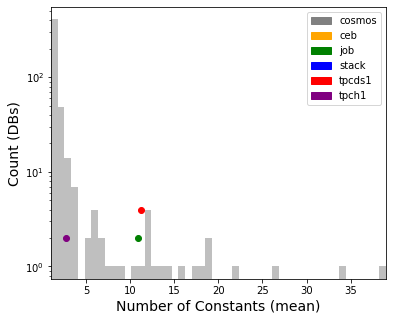

In [450]:
plot_distribution(pconsts1, "mean", "Number of Constants ({})".format("mean"), "NoSubqueries")

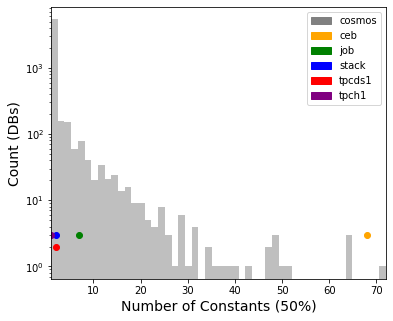

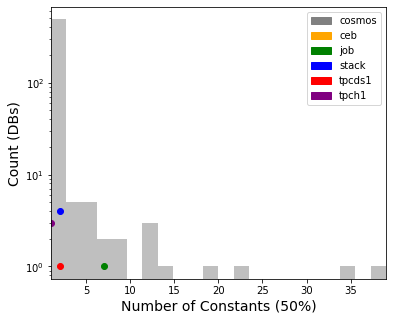

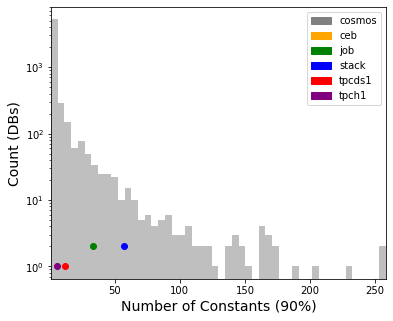

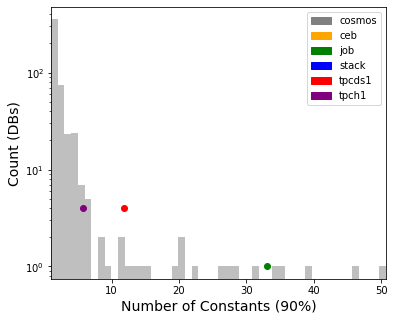

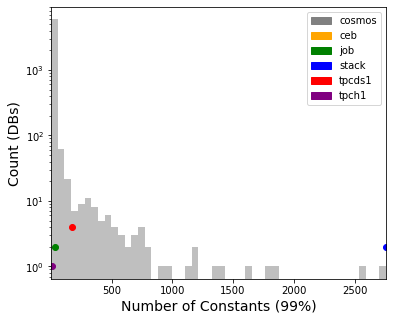

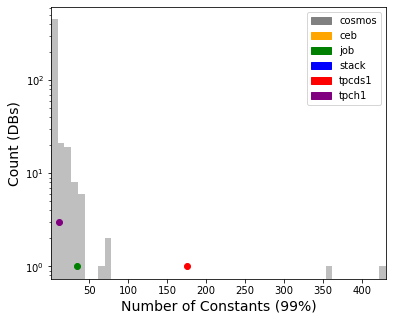

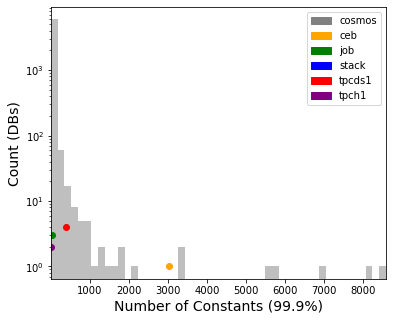

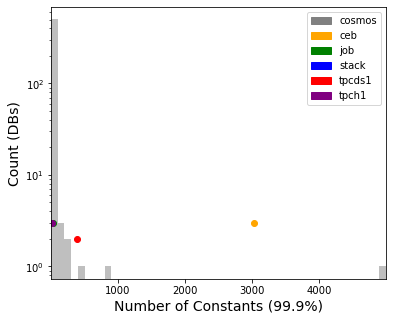

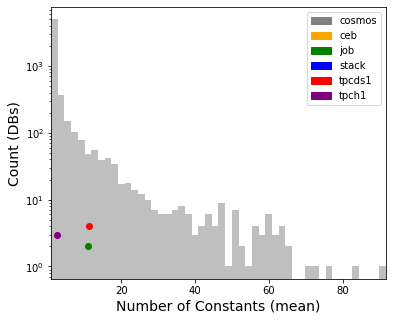

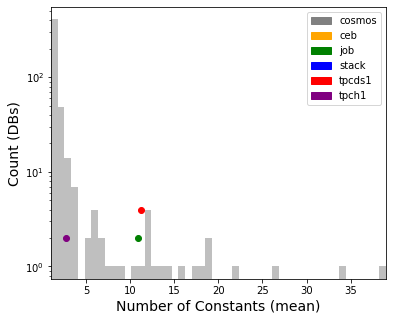

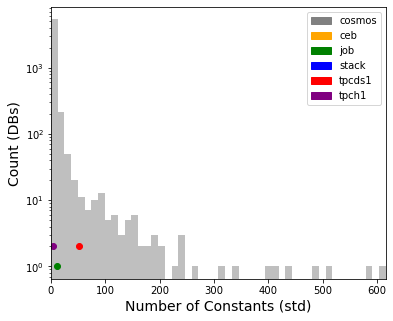

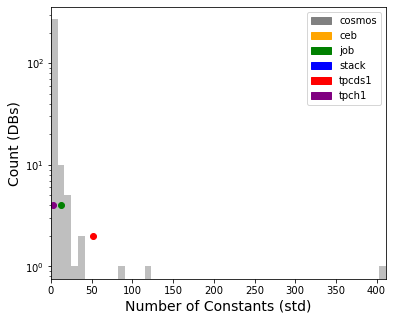

In [484]:
for p in PERCENTILES:
    plot_distribution(pconsts, p, "Number of Constants ({})".format(p), prefix="IncludesSubqueries")
    plot_distribution(pconsts1, p, "Number of Constants ({})".format(p), prefix="NoSubqueries")

# Discrete Predicates on ID columns

In [319]:
def check_id(row):
    col = row["column"].lower()
    if "id" in col and is_int(row["constant"]):
        return True
    else:
        return False

In [320]:
#discdf["is_id"] = discdf.apply(lambda x: check_id(x) ,axis=1)

In [321]:
# iddf = discdf[discdf.is_id == True]
# set(iddf["column"])

# Number of unique LIKE constants (and showing how common they are across multiple inputs etc.)

In [322]:
likedf = opdf[opdf.op.isin(["LIKE"])]
print(len(likedf))
#likedf = likedf.drop_duplicates(["constant", "input", "column", "db"])
#print(len(likedf))
likedf = likedf[likedf.workload == "cosmos"]

74776


In [323]:
# tmp = likedf[likedf.constant == "ndrcode"]
# tmp

In [324]:
print(len(likedf))
print(len(set(likedf["constant"])))

68514
2343


In [325]:
pd.options.display.max_colwidth = 1000
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

In [326]:
HTML(likedf.groupby(["constant"])["op"].count().reset_index().sort_values(by="op", ascending=False).head(100).to_html())

In [327]:
likedf = opdf[opdf.op.isin(["LIKE"])]
print(len(likedf))
#likedf = likedf.drop_duplicates(["constant", "input", "column", "db"])
#print(len(likedf))
likedf = likedf[likedf.workload == "job"]

74776


In [328]:
print(len(likedf))
print(len(set(likedf["constant"])))

194
75


In [329]:
HTML(likedf.groupby(["constant"])["op"].count().reset_index().sort_values(by="op", ascending=False).head(100).to_html())

In [330]:
likedf = opdf[opdf.op.isin(["LIKE"])]
tmp = likedf.groupby(["workload", "constant"])["op"].count().reset_index()

In [331]:
tmp.groupby(["workload"])["op"].describe(percentiles=[0.9, 0.99])

count       mean         std  min  50%   90%      99%     max
workload                                                                
cosmos    2343.0  29.241997  161.365763  1.0  2.0  14.8  1226.00  1226.0
job         75.0   2.586667    2.563219  1.0  1.0   6.0    11.04    14.0
stack     1300.0   4.664615    8.420336  1.0  2.0  10.0    38.03   122.0
tpcds1       1.0   1.000000         NaN  1.0  1.0   1.0     1.00     1.0
tpch1        3.0   1.000000    0.000000  1.0  1.0   1.0     1.00     1.0

# Selectivity Patterns

### Multidimensional filters ---> dramatically less selectivity (is this matched in multidimensional filters on other dbs?)

### LIKE filters ---> a lot less selectivity; seems unlikely to match in JOB and CEB and others

In [99]:
#set(exprdf["StageName"])

In [100]:

#seldf.groupby(["cluster"])["Selectivity"].describe(percentiles=[0.25,0.75, 0.90, 0.95, 0.99])

In [101]:
#seldf1.groupby(["cluster"])["Selectivity"].describe(percentiles=[0.25,0.75, 0.90, 0.95, 0.99])

In [102]:
# print(len(seldf), len(set(seldf["db"])))
# print(len(seldf1), len(set(seldf1["db"])))

In [103]:
#seldbs = dbcounts[dbcounts["jobid"] >= 10]["db"].values
#seldbs = list(seldbs) + WKS
#selmeans = seldf.groupby(["db", "cluster", "workload"])[["Selectivity", "cont_ops", "discrete_ops"]].mean().reset_index()

In [56]:
psels = {}
PERCENTILES = ["50%", "90%", "99%", "99.9%", "mean", "std"]

In [47]:
seldf = exprdf[exprdf["RowCount"] != -1]
seldf1 = exprdf1[exprdf1["RowCount"] != -1]

selps = seldf.groupby(["input"])["Selectivity"].describe(percentiles=[0.5, 0.75, 0.9, 0.99, 0.999]).reset_index()
selps1 = seldf1.groupby(["input"])["Selectivity"].describe(percentiles=[0.5, 0.75, 0.9, 0.99, 0.999]).reset_index()
selps = selps[selps.input.isin(seldbs)]

selps1 = selps1[selps1.input.isin(seldbs1)]
print(len(selps))
print(len(selps1))

10843
1219


In [48]:
print(len(seldbs))
print(len(seldbs1))

10848
1224


In [49]:
selps = selps.merge(dbmeans, on="input", how="inner")
selps1 = selps1.merge(dbmeans1, on="input", how="inner")
print(len(selps))
print(len(selps1))
selps1.head(5)

11329
1316


input  count      mean       std           min           50%  \
0  -2146296051   10.0  0.000022  0.000033  2.493778e-10  1.770582e-07   
1  -2143743346   10.0  0.352071  0.206072  0.000000e+00  2.702410e-01   
2  -2141470936  308.0  0.000000  0.000000  0.000000e+00  0.000000e+00   
3  -2141470936  308.0  0.000000  0.000000  0.000000e+00  0.000000e+00   
4  -2141446845   29.0  0.196705  0.002086  1.934250e-01  1.965035e-01   

        75%       90%       99%     99.9%       max   cluster workload  \
0  0.000036  0.000075  0.000082  0.000082  0.000082  cosmos09   cosmos   
1  0.554892  0.619664  0.620802  0.620916  0.620929  cosmos15   cosmos   
2  0.000000  0.000000  0.000000  0.000000  0.000000  cosmos08   cosmos   
3  0.000000  0.000000  0.000000  0.000000  0.000000  cosmos15   cosmos   
4  0.196735  0.200368  0.201475  0.201603  0.201617  cosmos15   cosmos   

   cont_ops  discrete_ops  like_ops  
0  0.000000      0.700000       0.3  
1  0.000129      1.000000       0.0  
2  0.259912      0.740088       0.0  
3  0.255392      0.744608       0.0  
4  1.000000      0.000000       0.0

KeyError: 'cct'

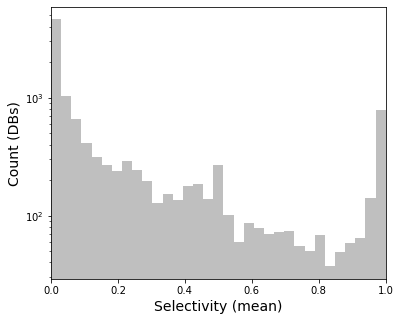

In [53]:
plot_distribution(selps, "mean", "Selectivity ({})".format("mean"), xlim=(0,100), 
                  prefix="IncludesSubqueries")

In [ ]:
for p in PERCENTILES:
    plot_distribution(selps, p, "Selectivity ({})".format(p), xlim=None, 
                  prefix="IncludesSubqueries")
    plot_distribution(selps1, p, "Selectivity ({})".format(p), xlim=None, 
              prefix="NoSubqueries")
    
#     print(p)
#     sns.distplot(selps[p], kde=False)
#     #plt.yscale("log")
#     plt.show()
#     sns.distplot(selps1[p], kde=False)
#     plt.yscale("log")
#     plt.show()

In [59]:


FN_TMP = "./dataset_comparison-inputs/{prefix}-{xlabel}-{ylabel}.png"
make_dir("dataset_comparison-inputs")

def plot_sel_fig(df, x, y, xlabel, ylabel, prefix=""):
    means1 = df[df.workload == "cosmos"]
    means2 = df[df.workload != "cosmos"]
    fig,ax = plt.subplots(nrows=1,ncols=1, figsize=(8,6))
    
    sns.scatterplot(data=means1, x=x, y=y, alpha=0.3, hue="workload", palette=["grey"])
    sns.scatterplot(data=means2, x=x, y=y, alpha=1.0, hue="workload", s=100, palette=DSCOLORS)
    
    ax.legend(title="Workload",
              #bbox_to_anchor=(, 1.10), 
              loc="upper center",
              ncol=3,
             frameon = True, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=14)
    
    fn = FN_TMP.format(prefix=prefix,
                       xlabel=xlabel, 
                       ylabel=ylabel)
    fn = fn.replace(" ", "_")
    
    plt.savefig(fn, dpi=200, facecolor='w')
    plt.show()
    plt.close()

50%


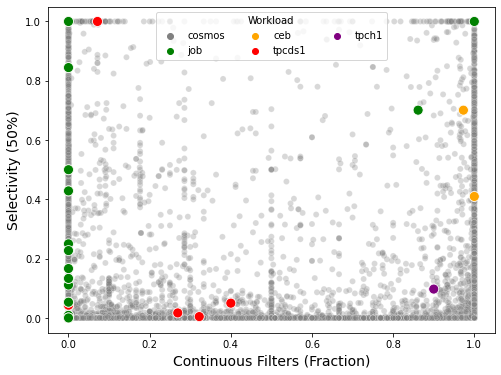

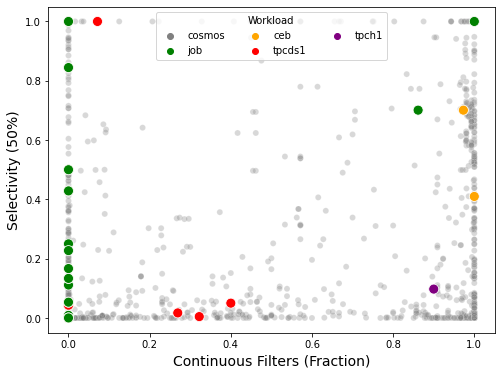

90%


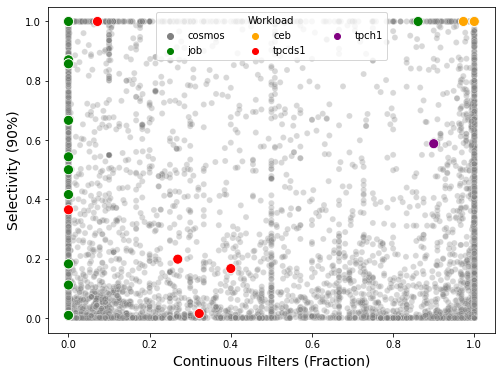

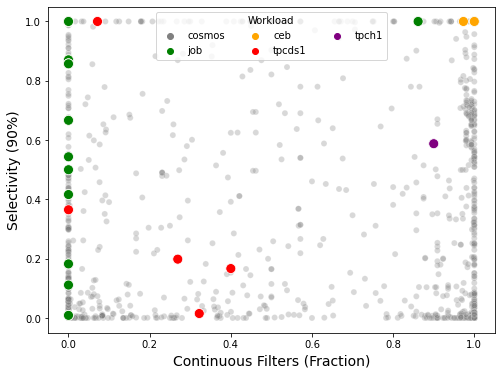

99%


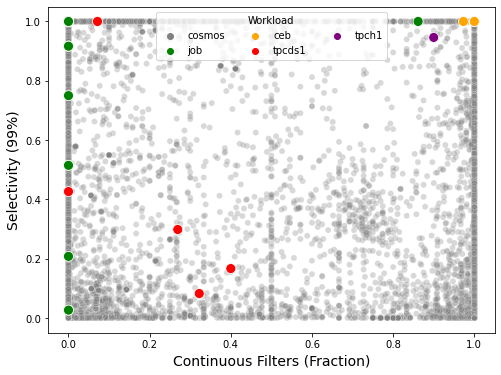

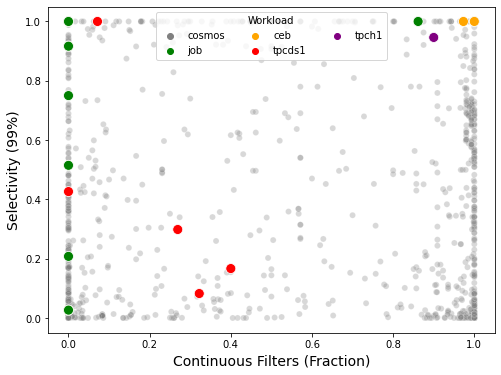

99.9%


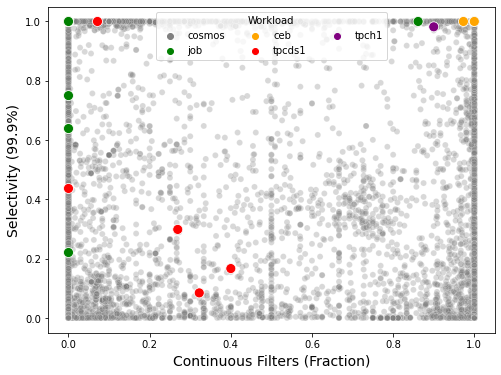

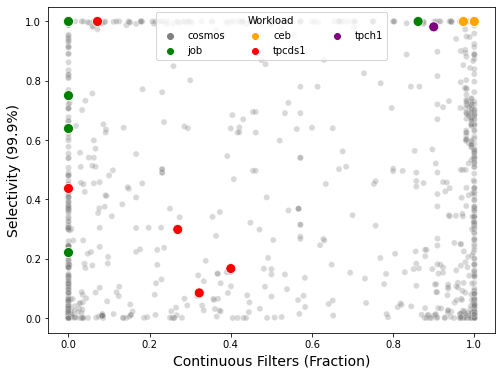

mean


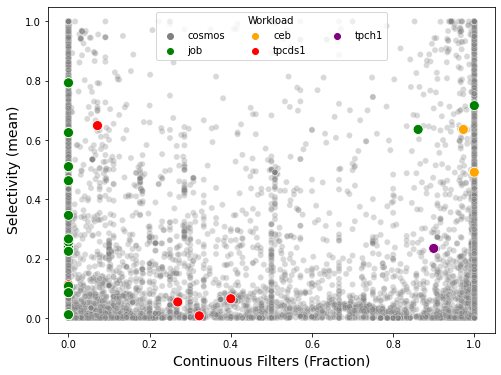

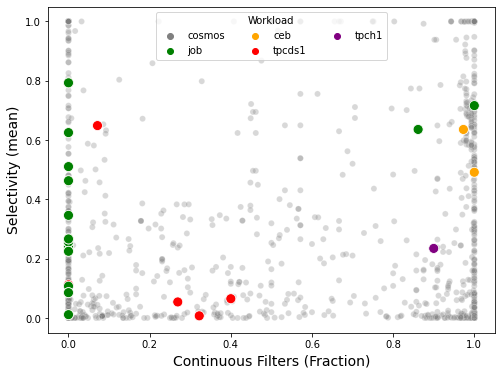

std


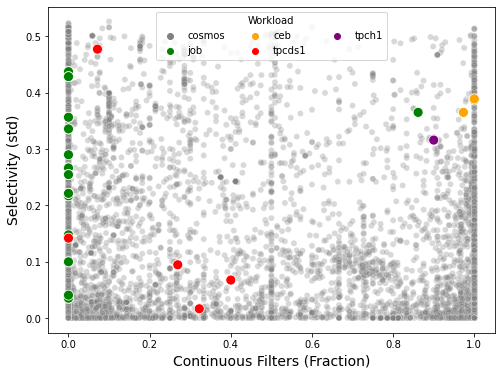

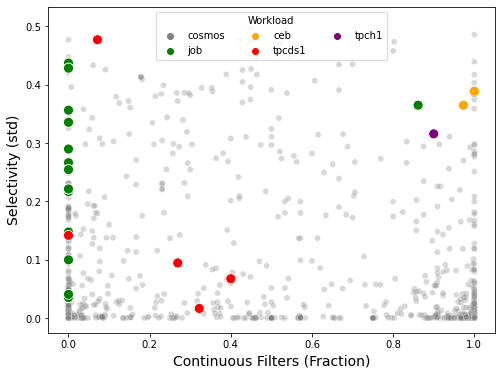

In [60]:
for p in PERCENTILES:
    print(p)
    plot_sel_fig(selps, "cont_ops", p, "Continuous Filters (Fraction)", "Selectivity ({})".format(p), 
                prefix="IncludesSubqueries")
    plot_sel_fig(selps1, "cont_ops", p, "Continuous Filters (Fraction)", "Selectivity ({})".format(p), 
            prefix="NoSubqueries")
    plt.show()

In [61]:
# for p in PERCENTILES:
#     print(p)
#     plot_sel_fig(selps1, "cont_ops", p, "Continuous Filters (Fraction)", "Selectivity ({})".format(p),
#                 prefix="NoSubqueries")
#     plt.show()

In [62]:
selmeans = selmeans[selmeans.db.isin(seldbs)]
selmeans["Selectivity"].describe()

NameError: name 'selmeans' is not defined

In [120]:
tmp2 = selmeans[selmeans["Selectivity"] == 0]
print(len(tmp2))

45


/home/pari/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


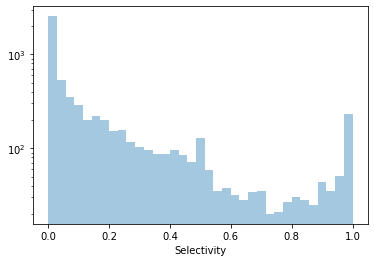

In [58]:
sns.distplot(selmeans["Selectivity"], kde=False)
#sns.distplot(dbmeans["discrete_ops"], kde=False)
#sns.distplot(dbmeans["like_ops"], kde=False)
plt.yscale("log")

In [350]:
# means1 = selmeans[selmeans.workload == "cosmos"]
# #means2 = dbmeans[dbmeans.workload != "cosmos"]
# fig,ax = plt.subplots(nrows=1,ncols=1, figsize=(8,5))

# sns.scatterplot(data=means1, x="cont_ops", y="Selectivity", alpha=0.3, hue="workload", palette=["grey"])
# #sns.scatterplot(data=means2, x="cont_ops", y="discrete_ops", alpha=1.0, hue="workload", s=100, palette=DSCOLORS)

# ax.legend(title="Workload", bbox_to_anchor=(0.1, 1.00), ncol=5,
#          frameon = True, fontsize=10)

# ax.set_ylabel("Selectivity", fontsize=14)
# ax.set_xlabel("Continuous Filters (Fraction)", fontsize=14)

# #plt.savefig("Discrete-Continuous.png", dpi=200)
# plt.show()

# Number of unique filter columns per job

In [351]:
exprdf.keys()

Index(['jobid', 'input', 'unique_filter_cols', 'discrete_ops', 'cont_ops',
       'like_ops', 'num_unique_ops', 'num_ops', 'num_discrete_consts',
       'num_likes', 'like_lens', 'workload', 'db', 'cluster', 'StageName',
       'InputCardinality', 'RowCount', 'Selectivity', 'Stage1'],
      dtype='object')

In [352]:
exprdf = exprdf[~exprdf.input.isin(["X", "function"])]

In [353]:
exprdf.groupby("workload")["unique_filter_cols"].describe(percentiles=[0.75, 0.9, 0.99, 0.999])

count      mean       std  min  50%  75%  90%   99%  99.9%   max
workload                                                                     
cosmos    898939.0  1.484905  1.107594  1.0  1.0  1.0  3.0  7.00  8.000  13.0
job          542.0  1.071956  0.258653  1.0  1.0  1.0  1.0  2.00  2.000   2.0
stack      33035.0  1.168155  0.527987  1.0  1.0  1.0  2.0  4.00  5.000   6.0
tpcds1       267.0  1.483146  0.684617  1.0  1.0  2.0  2.0  3.34  4.734   5.0
tpch1         36.0  1.250000  0.603561  1.0  1.0  1.0  2.0  3.00  3.000   3.0

In [354]:
seldbs = dbcounts[dbcounts["jobid"] >= 10]["db"].values
#seldbs = list(seldbs) + WKS

In [355]:
print(len(seldbs))

2151


In [357]:
dbfiltercols = exprdf.groupby("input")["unique_filter_cols"].max().reset_index()
#dbfiltercols = dbfiltercols[dbfiltercols.db.isin(seldbs)]

/home/pari/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


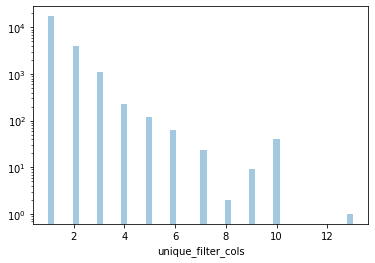

In [358]:
sns.distplot(dbfiltercols["unique_filter_cols"], kde=False)
plt.yscale("log")
#plt.xscale("log")

In [360]:
exprdf.groupby(["input", "workload"])["unique_filter_cols"].max().reset_index()

input workload  unique_filter_cols
0      -2147391892   cosmos                   1
1      -2147344906   cosmos                   1
2      -2145787508   cosmos                   1
3      -2145766349   cosmos                   1
4      -2145704237   cosmos                   2
...            ...      ...                 ...
22784    web_sales   tpcds1                   3
22785     web_site   tpcds1                   1
22786    whitelist    stack                   1
22787         wiki    stack                   2
22788   yourAnswer    stack                   1

[22789 rows x 3 columns]

In [66]:
dbfiltercols = exprdf.groupby("input")["unique_filter_cols"].mean().reset_index()
#dbfiltercols = dbfiltercols[dbfiltercols.db.isin(seldbs)]

/home/pari/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


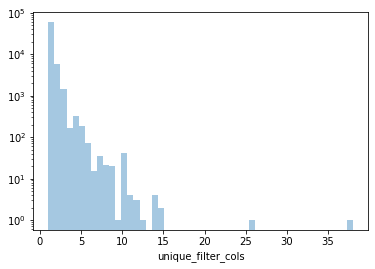

In [67]:
sns.distplot(dbfiltercols["unique_filter_cols"], kde=False)
plt.yscale("log")
#plt.xscale("log")

In [68]:
def pretty_print(df):
    return display( HTML( df.to_html(index=False).replace("\\n","<br>") ) )

In [69]:
# #STATCOLS = ["ExclusiveTime", "Selectivity", "QError", "VertexCount", "exploratory_job", "templated_job"]
# STATSTODROP = ["std", "min", "max"]
# STATCOLS = ["Selectivity", "InputCardinality"]
# curdrops = []
# for si, stc in enumerate(STATCOLS):
#     for sdrop in STATSTODROP:
#         curdrops.append(tuple([stc, sdrop]))
#     if si != 0:
#         curdrops.append(tuple([stc,"count"]))

# #curdrops.append(tuple(["QError","mean"]))
# #curdrops.append(tuple(["VertexCount","mean"]))
# #print(curdrops)
# pretty_print(cdf.groupby(["unique_filter_cols"])[STATCOLS].describe(percentiles=[0.9, 0.99]).\
#      reset_index().\
#      #.sort_values(by=("Selectivity","count"), ascending=False).\
#      rename(columns={"cont_ops":"> or <", "discrete_ops":"=,!=", "like_ops":"LIKE"}).\
#      drop(columns=curdrops).round(2))

# Multi-Dimensional Filter Kinds

In [70]:
multidf = exprdf[exprdf.unique_filter_cols == 2]

In [71]:
def kind_multi_dim_index(row):
    kinds = []
    if row["discrete_ops"] == 1:
        kinds.append("discrete")
        
    if row["cont_ops"] == 1:
        kinds.append("cont")
        
    if row["like_ops"] == 1:
        kinds.append("like")
    
    kinds.sort()
    return ",".join(kinds)

In [72]:
multidf["multikind"] = multidf.apply(lambda x: kind_multi_dim_index(x) , axis=1)

/tmp/ipykernel_734666/319002343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multidf["multikind"] = multidf.apply(lambda x: kind_multi_dim_index(x) , axis=1)


In [412]:
multidf.groupby("multikind")["jobid"].describe()

count unique                                   top  freq
multikind                                                                    
cont                 54090  12860  84beead7-4626-4aec-9081-736a97feb48e  1655
cont,discrete       436437  49210  ad49cde6-c115-44e3-99f2-e7239dc14f77  1620
cont,discrete,like    1045    643  323821e3-e4c2-4bad-abb5-b7153f687fd3     2
cont,like            67507   2317  023e8161-2ea1-42ab-b6b1-a2d62d8ab05c   848
discrete            339091  36505  558784e6-15eb-4414-883e-63fdc393e94d  2177
discrete,like        95436   5423  20fe1d3d-2a75-45bf-9dd5-0114c62547ce  7473
like                  1133   1001  ebb7b2c2-b3ef-4606-95f0-9dd1df03cb5a    42

In [413]:
multidf.groupby(["workload", "multikind"])["jobid"].describe()

count unique  \
workload multikind                           
cosmos   cont                 54084  12856   
         cont,discrete       436416  49192   
         cont,discrete,like    1045    643   
         cont,like            67501   2311   
         discrete            339035  36468   
         discrete,like        95410   5398   
         like                  1127    995   
job      cont,like              6.0    6.0   
         discrete               2.0    2.0   
         discrete,like         25.0   24.0   
         like                   6.0    6.0   
stack    cont                     0      0   
         cont,discrete            0      0   
         cont,discrete,like       0      0   
         cont,like                0      0   
         discrete                 0      0   
         discrete,like            0      0   
         like                     0      0   
tpcds    cont                   6.0    4.0   
         cont,discrete         20.0   17.0   
         discrete              53.0   36.0   
tpch     cont,discrete          1.0    1.0   
         discrete               1.0    1.0   
         discrete,like          1.0    1.0   

                                                              top  freq  
workload multikind                                                       
cosmos   cont                84beead7-4626-4aec-9081-736a97feb48e  1655  
         cont,discrete       ad49cde6-c115-44e3-99f2-e7239dc14f77  1620  
         cont,discrete,like  323821e3-e4c2-4bad-abb5-b7153f687fd3     2  
         cont,like           2ef91502-8b50-4ef8-96cd-b3be36ff3974   848  
         discrete            558784e6-15eb-4414-883e-63fdc393e94d  2177  
         discrete,like       20fe1d3d-2a75-45bf-9dd5-0114c62547ce  7473  
         like                ebb7b2c2-b3ef-4606-95f0-9dd1df03cb5a    42  
job      cont,like                                            4.0   1.0  
         discrete                                             0.0   1.0  
         discrete,like                                      100.0   2.0  
         like                                                 0.0   1.0  
stack    cont                                                 NaN   NaN  
         cont,discrete                                        NaN   NaN  
         cont,discrete,like                                   NaN   NaN  
         cont,like                                            NaN   NaN  
         discrete                                             NaN   NaN  
         discrete,like                                        NaN   NaN  
         like                                                 NaN   NaN  
tpcds    cont                                                25.0   3.0  
         cont,discrete                                       49.0   2.0  
         discrete                                            26.0   3.0  
tpch     cont,discrete                                       11.0   1.0  
         discrete                                             0.0   1.0  
         discrete,like                                       10.0   1.0

# Number of filter columns per input

In [365]:
fcols = opdf.groupby(["input", "workload", "cluster"])["column"].nunique().reset_index()\
    .rename(columns={"column":"AllFilterColumns"})
fcols = fcols[~fcols.input.isin(["X", "function"])]

In [366]:
fcols.groupby(["workload"])["AllFilterColumns"].describe(percentiles=[0.9, 0.99, 0.999])

count      mean       std  min  50%  90%    99%   99.9%   max
workload                                                                 
cosmos    20717.0  2.067964  2.420649  1.0  1.0  4.0  11.00  24.000  79.0
job          17.0  1.352941  0.701888  1.0  1.0  2.4   3.00   3.000   3.0
stack       361.0  2.116343  3.864767  1.0  1.0  3.0  18.60  37.640  38.0
tpcds1       35.0  3.314286  2.867377  1.0  2.0  8.6  10.32  10.932  11.0
tpch1         7.0  3.000000  2.236068  1.0  2.0  5.8   6.88   6.988   7.0

In [367]:
tmp = fcols[fcols["AllFilterColumns"] == 38]
tmp

input workload cluster  AllFilterColumns
21033  posts    stack   stack                38

In [368]:
ccols = fcols[fcols.workload == "cosmos"]
dballcols = ccols.groupby("input")["AllFilterColumns"].max().reset_index()
#dballcols = dballcols[dballcols.db.isin(seldbs)]

/home/pari/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


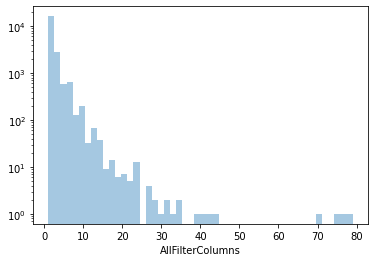

In [369]:
sns.distplot(dballcols["AllFilterColumns"], kde=False)
plt.yscale("log")

# Combine input allcols and uniquefiltercols

In [ ]:
#exprdf = exprdf[exprdf.input.isin()]

In [393]:
#GROUP_FIELD = "input"

In [441]:
#udf = exprdf.groupby([GROUP_FIELD, "workload"])["unique_filter_cols"].max().reset_index()
#udf = exprdf.groupby(["db", "workload"])["unique_filter_cols"].mean().reset_index()
#udf = udf[udf.db.isin(seldbs)]

In [73]:
udf = opdf.groupby(["db", "exprhash", "workload"])["column"].nunique().reset_index()
udf = udf.groupby(["db", "workload"])["column"].mean().reset_index().rename(columns={"column":"UniqueFilterCols"})

In [74]:
#fcols = fcols[~fcols.input.isin(["X", "function"])]
#fcols = fcols[fcols.db.isin(seldbs)]
fcols = opdf.groupby(["db", "input", "workload", "cluster"])["column"].nunique().reset_index()

In [75]:
fcols = fcols.groupby(["db", "workload"])["column"].mean().reset_index().rename(columns={"column":"AllFilterColumns"})
#fcols

In [454]:
#print(len(set(fcols["input"])), len(set(udf["input"])))
#print(len(set(fcols[GROUP_FIELD])), len(set(udf[GROUP_FIELD])))

In [455]:
fcols = fcols[fcols["db"].isin(udf["db"].values)]

In [474]:
cmb = udf.merge(fcols, on=["db", "workload"])
#cmb.head(50)

<AxesSubplot:xlabel='UniqueFilterCols', ylabel='AllFilterColumns'>

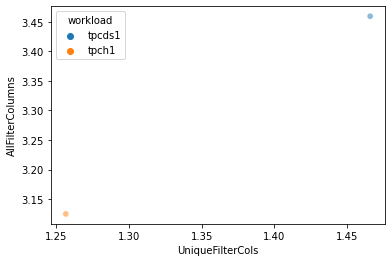

In [457]:
cmbtpc = cmb[cmb.workload.str.contains("tpc")]
sns.scatterplot(data=cmbtpc, x="UniqueFilterCols", y="AllFilterColumns", hue="workload", alpha=0.5)

<AxesSubplot:xlabel='UniqueFilterCols', ylabel='AllFilterColumns'>

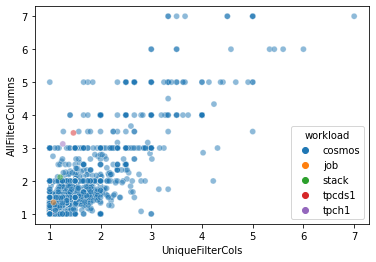

In [458]:
sns.scatterplot(data=cmb, x="UniqueFilterCols", y="AllFilterColumns", hue="workload", alpha=0.5)

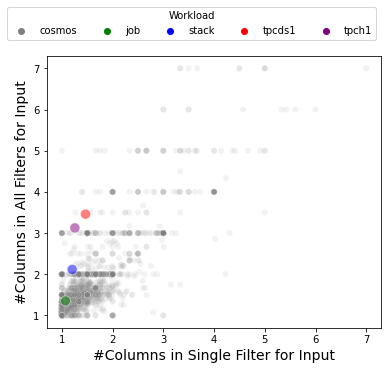

In [461]:
means1 = cmb[cmb.workload == "cosmos"]
means2 = cmb[cmb.workload != "cosmos"]
fig,ax = plt.subplots(nrows=1,ncols=1, figsize=(6,5))

sns.scatterplot(data=means1, x="UniqueFilterCols", y="AllFilterColumns", alpha=0.1, hue="workload", palette=["grey"])
sns.scatterplot(data=means2, x="UniqueFilterCols", y="AllFilterColumns", alpha=0.5, hue="workload", 
                s=100, palette=DSCOLORS)

# ax.legend(title="Workload", bbox_to_anchor=(0.20, 1.00), ncol=2,
#          frameon = False, fontsize=14)
ax.legend(title="Workload", bbox_to_anchor=(1, 1.20), ncol=5,
         frameon = True, fontsize=10)
#ax.set_yscale("log")
#ax.set_xlim([0,15])

ax.set_ylabel("#Columns in All Filters for Input", fontsize=14)
ax.set_xlabel("#Columns in Single Filter for Input", fontsize=14)

plt.savefig("AllColumns-vs-FilterColumn.png", dpi=200)
plt.show()

# Continuous vs #Columns

In [453]:
# def plot_sel_fig(df, x, y, xlabel, ylabel):
#     means1 = df[df.workload == "cosmos"]
#     means2 = df[df.workload != "cosmos"]
#     fig,ax = plt.subplots(nrows=1,ncols=1, figsize=(8,6))
    
#     sns.scatterplot(data=means1, x=x, y=y, alpha=0.3, hue="workload", palette=["grey"])
#     sns.scatterplot(data=means2, x=x, y=y, alpha=1.0, hue="workload", s=100, palette=DSCOLORS)
    
#     ax.legend(title="Workload",
#               #bbox_to_anchor=(, 1.10), 
#               ncol=3,
#              frameon = True, fontsize=10)
#     ax.set_ylabel(ylabel, fontsize=14)
#     ax.set_xlabel(xlabel, fontsize=14)

#     #plt.savefig("Discrete-Continuous.png", dpi=200)
#     plt.show()
#     plt.close()

In [458]:
udf = opdf.groupby(["db", "exprhash", "workload"])["column"].nunique().reset_index()
udf = udf.groupby(["db", "workload"])["column"].describe(percentiles=[0.5, 0.75, 0.9, 0.99, 0.999]).reset_index()
udf = udf[udf.db.isin(seldbs)]
udf = udf.merge(dbmeans, on=["db", "workload"], how="inner")
udf

db workload    count      mean       std  min  50%  75%  \
0                  ceb      ceb  17796.0  1.047426  0.226382  1.0  1.0  1.0   
1     cosmos08-0473122   cosmos      8.0  1.500000  1.414214  1.0  1.0  1.0   
2     cosmos08-0473139   cosmos     44.0  1.431818  0.661138  1.0  1.0  2.0   
3     cosmos08-0473163   cosmos     46.0  1.000000  0.000000  1.0  1.0  1.0   
4     cosmos08-0473182   cosmos     32.0  1.000000  0.000000  1.0  1.0  1.0   
...                ...      ...      ...       ...       ...  ...  ...  ...   
6293  cosmos15-9911838   cosmos     26.0  1.000000  0.000000  1.0  1.0  1.0   
6294               job      job    598.0  1.065217  0.247116  1.0  1.0  1.0   
6295             stack    stack  31145.0  1.203789  0.581015  1.0  1.0  1.0   
6296            tpcds1   tpcds1    281.0  1.466192  0.681199  1.0  1.0  2.0   
6297             tpch1    tpch1     39.0  1.256410  0.594623  1.0  1.0  1.0   

      90%   99%  99.9%  max   cluster  cont_ops  discrete_ops  like_ops  
0     1.0  2.00  3.000  3.0       ceb  0.145946      0.786426  0.072302  
1     2.2  4.72  4.972  5.0  cosmos08  0.133333      0.866667  0.000000  
2     2.0  3.00  3.000  3.0  cosmos08  0.000000      1.000000  0.000000  
3     1.0  1.00  1.000  1.0  cosmos08  0.978261      0.978261  0.000000  
4     1.0  1.00  1.000  1.0  cosmos08  0.000000      1.000000  0.000000  
...   ...   ...    ...  ...       ...       ...           ...       ...  
6293  1.0  1.00  1.000  1.0  cosmos15  1.000000      0.000000  0.000000  
6294  1.0  2.00  2.000  2.0       job  0.128763      0.722408  0.204013  
6295  2.0  4.00  6.000  7.0     stack  0.371122      0.608536  0.105979  
6296  2.0  3.20  4.720  5.0    tpcds1  0.400000      0.703571  0.003571  
6297  2.0  3.00  3.000  3.0     tpch1  0.461538      0.564103  0.076923  

[6298 rows x 16 columns]

In [457]:
udf1 = opdf1.groupby(["db", "exprhash", "workload"])["column"].nunique().reset_index()
udf1 = udf1.groupby(["db", "workload"])["column"].describe(percentiles=[0.5, 0.75, 0.9, 0.99, 0.999]).reset_index()
udf1 = udf1[udf1.db.isin(seldbs1)]
udf1 = udf1.merge(dbmeans1, on=["db", "workload"], how="inner")
udf1

db workload    count      mean       std  min  50%  75%  \
0                  ceb      ceb  17796.0  1.047426  0.226382  1.0  1.0  1.0   
1     cosmos08-0473182   cosmos      2.0  1.000000  0.000000  1.0  1.0  1.0   
2     cosmos08-0473383   cosmos      2.0  1.000000  0.000000  1.0  1.0  1.0   
3     cosmos08-0473458   cosmos      1.0  1.000000       NaN  1.0  1.0  1.0   
4     cosmos08-0473464   cosmos     32.0  1.125000  0.421212  1.0  1.0  1.0   
..                 ...      ...      ...       ...       ...  ...  ...  ...   
629  cosmos15-96149128   cosmos      1.0  1.000000       NaN  1.0  1.0  1.0   
630                job      job    598.0  1.065217  0.247116  1.0  1.0  1.0   
631              stack    stack  31145.0  1.203789  0.581015  1.0  1.0  1.0   
632             tpcds1   tpcds1    281.0  1.466192  0.681199  1.0  1.0  2.0   
633              tpch1    tpch1     39.0  1.256410  0.594623  1.0  1.0  1.0   

     90%   99%  99.9%  max   cluster  cont_ops  discrete_ops  like_ops  
0    1.0  2.00  3.000  3.0       ceb  0.145946      0.786426  0.072302  
1    1.0  1.00  1.000  1.0  cosmos08  0.000000      1.000000  0.000000  
2    1.0  1.00  1.000  1.0  cosmos08  1.000000      0.000000  0.000000  
3    1.0  1.00  1.000  1.0  cosmos08  0.026316      0.342105  0.684211  
4    1.0  2.69  2.969  3.0  cosmos08  0.474711      0.678468  0.025289  
..   ...   ...    ...  ...       ...       ...           ...       ...  
629  1.0  1.00  1.000  1.0  cosmos15  1.000000      0.000000  0.000000  
630  1.0  2.00  2.000  2.0       job  0.128763      0.722408  0.204013  
631  2.0  4.00  6.000  7.0     stack  0.371122      0.608536  0.105979  
632  2.0  3.20  4.720  5.0    tpcds1  0.400000      0.703571  0.003571  
633  2.0  3.00  3.000  3.0     tpch1  0.461538      0.564103  0.076923  

[634 rows x 16 columns]

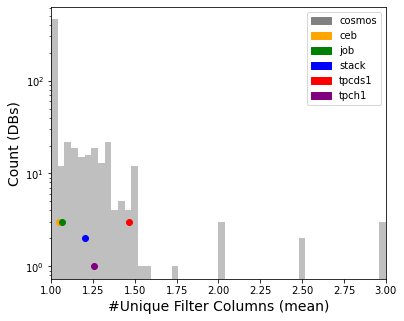

In [477]:
plot_distribution(udf1, "mean", "#Unique Filter Columns ({})".format("mean"), xlim=None, 
                  prefix="NoSubqueries")

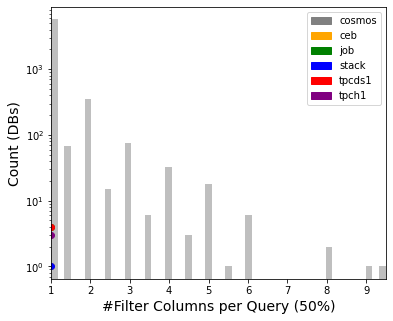

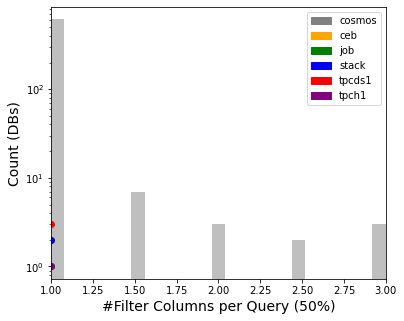

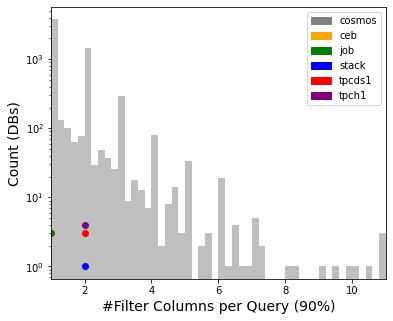

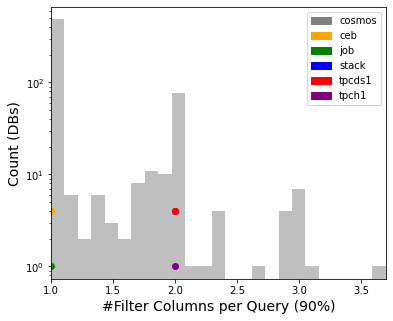

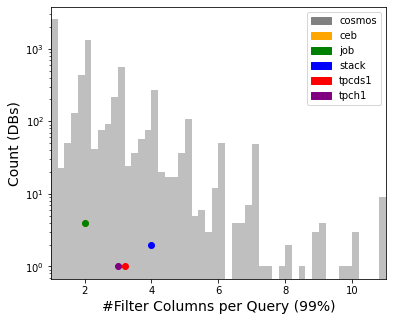

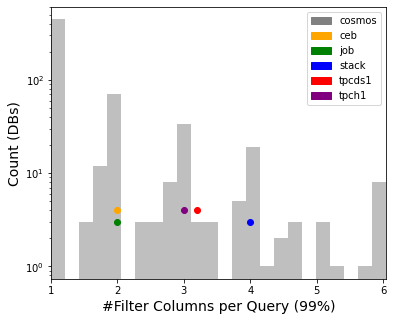

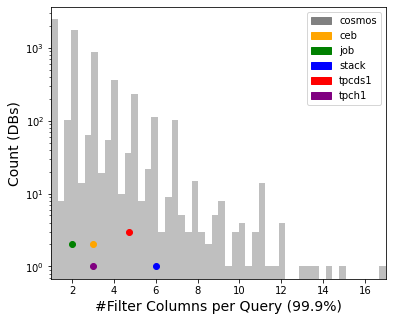

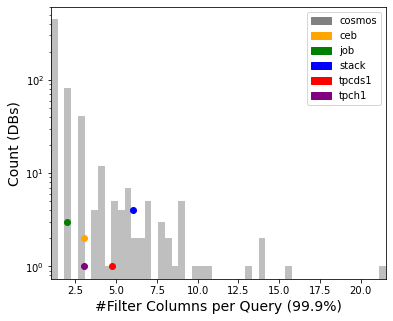

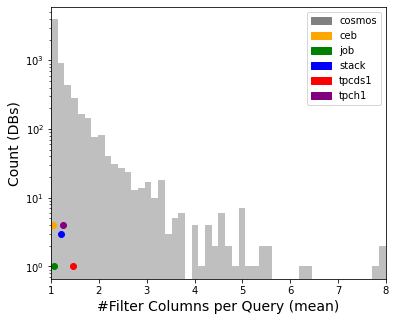

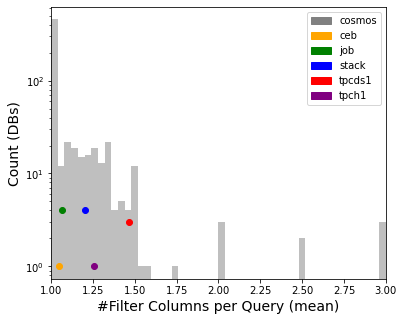

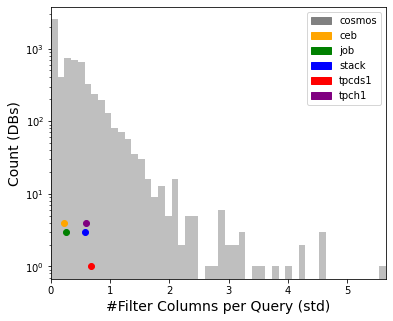

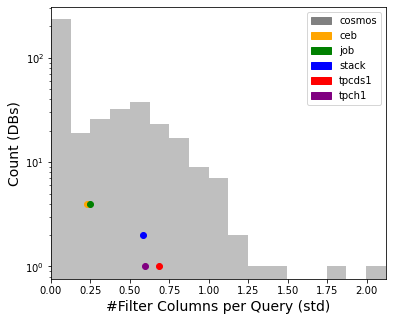

In [478]:
for p in PERCENTILES:
    plot_distribution(udf, p, "#Filter Columns per Query ({})".format(p), xlim=None, 
              prefix="IncludeSubqueries")
    plot_distribution(udf1, p, "#Filter Columns per Query ({})".format(p), xlim=None, 
          prefix="NoSubqueries")

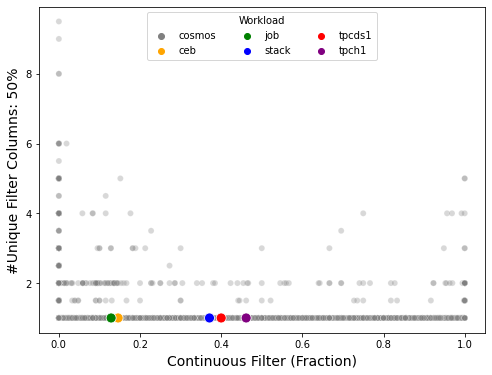

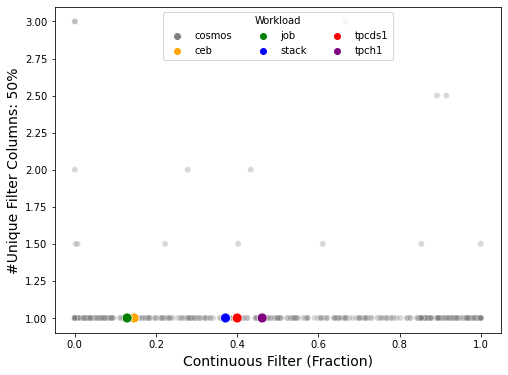

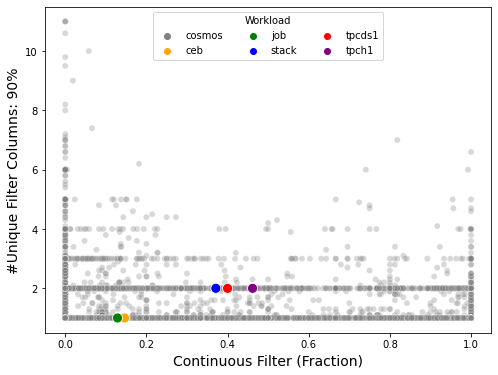

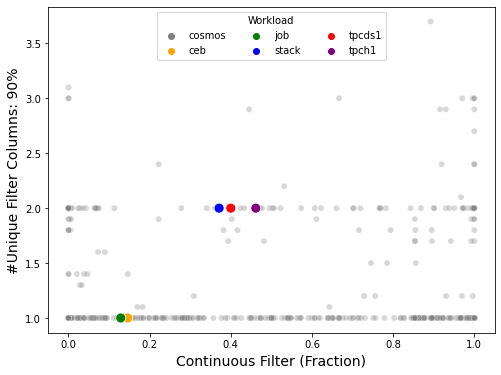

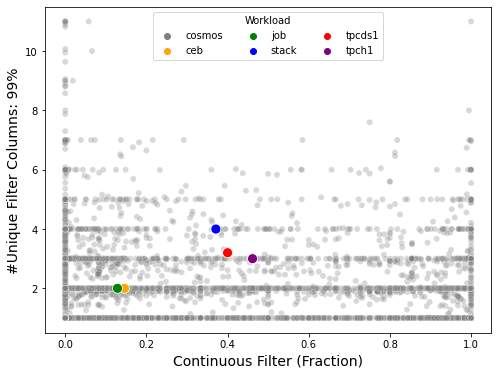

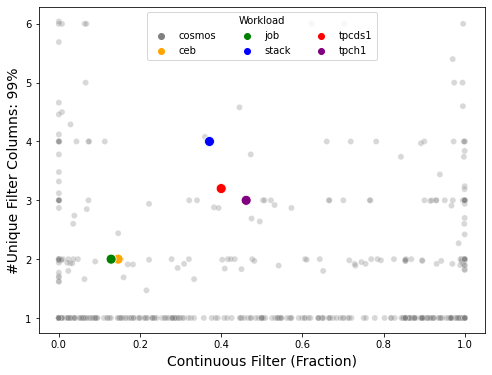

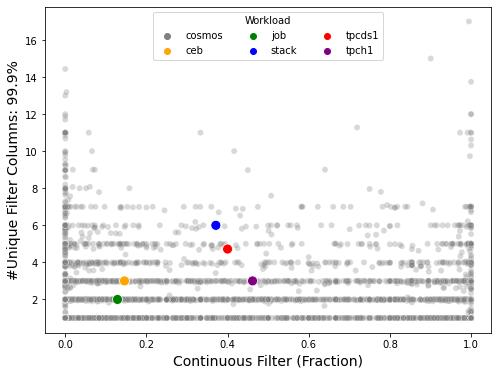

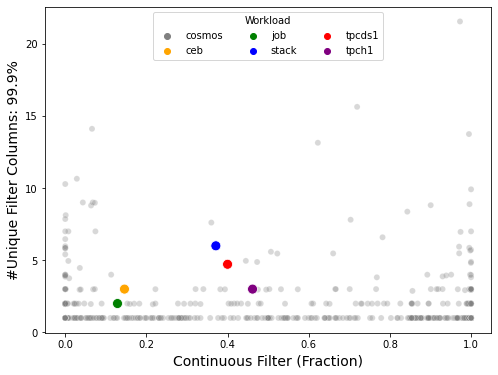

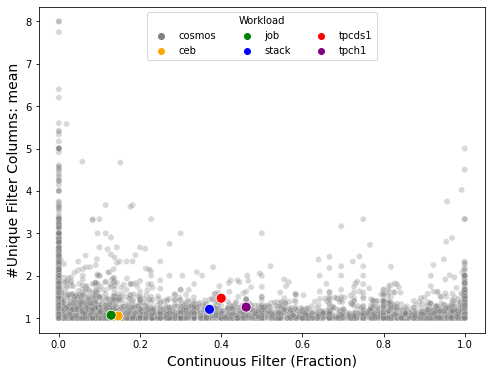

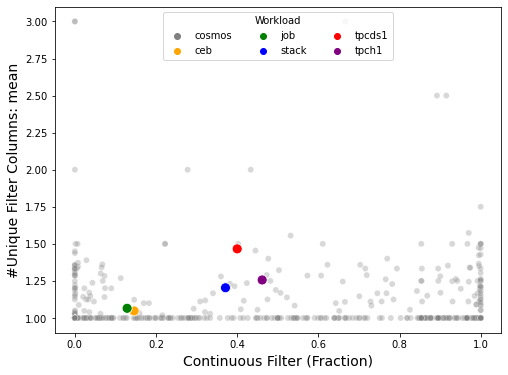

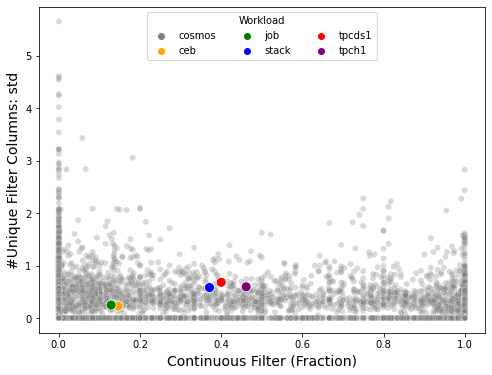

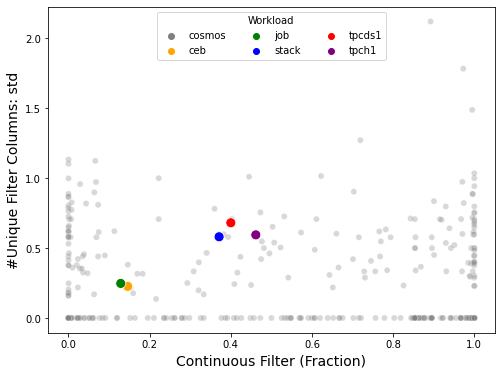

In [459]:
#def plot_sel_fig(df, x, y, xlabel, ylabel):

for p in PERCENTILES:
    plot_sel_fig(udf, "cont_ops", p, "Continuous Filter (Fraction)", "#Unique Filter Columns: " + p,
                prefix="IncludesSubqueries")
    plot_sel_fig(udf1, "cont_ops", p, "Continuous Filter (Fraction)", "#Unique Filter Columns: " + p,
            prefix="NoSubqueries")

In [466]:
fcols = opdf.groupby(["db", "input", "workload", "cluster"])["column"].nunique().reset_index()
fcols = fcols[fcols.db.isin(seldbs)]
fcols = fcols.groupby(["db", "workload"])["column"].describe(percentiles=[0.5,0.9,0.99, 0.999]).reset_index()
fcols = fcols.merge(dbmeans, on=["db", "workload"], how="inner")

In [467]:
fcols1 = opdf1.groupby(["db", "input", "workload", "cluster"])["column"].nunique().reset_index()
fcols1 = fcols1[fcols1.db.isin(seldbs1)]
fcols1 = fcols1.groupby(["db", "workload"])["column"].describe(percentiles=[0.5,0.9,0.99, 0.999]).reset_index()
fcols1 = fcols1.merge(dbmeans1, on=["db", "workload"], how="inner")

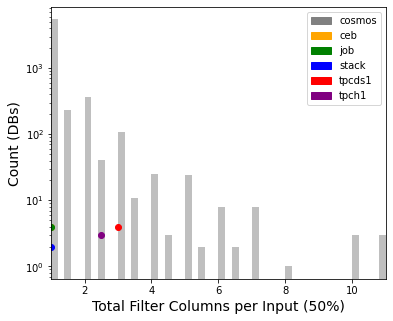

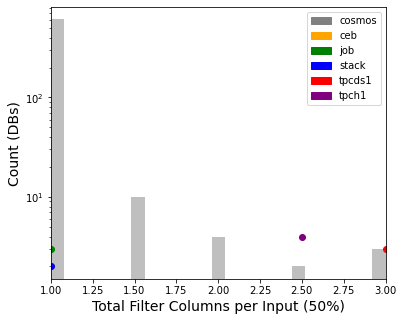

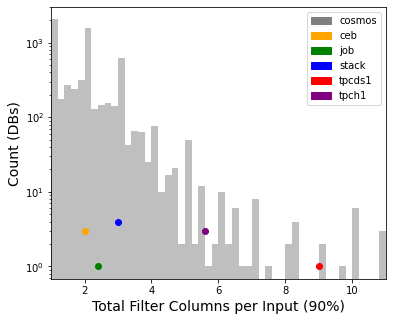

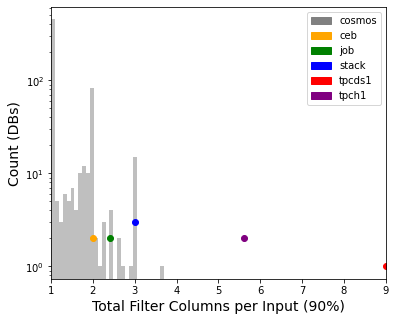

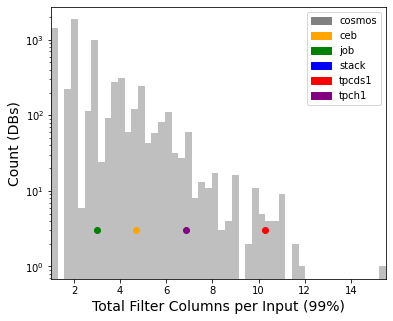

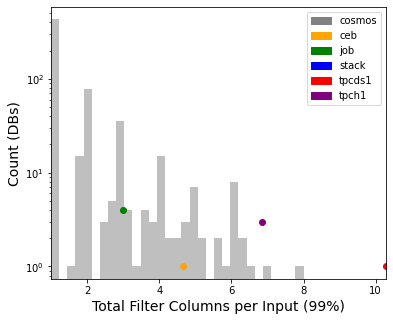

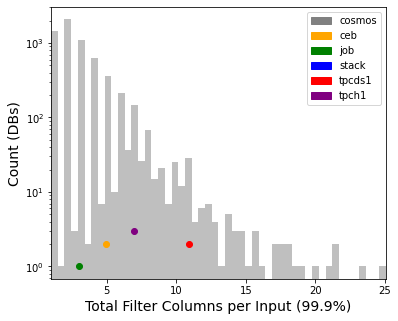

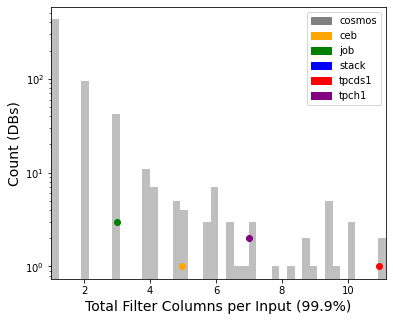

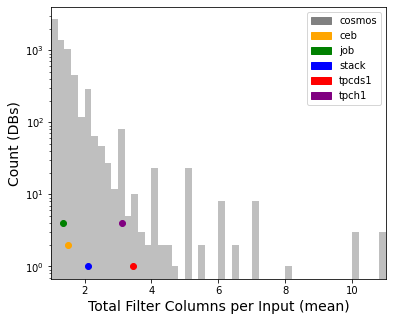

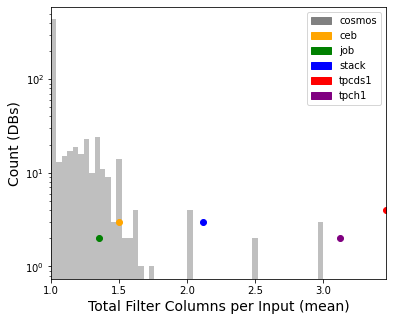

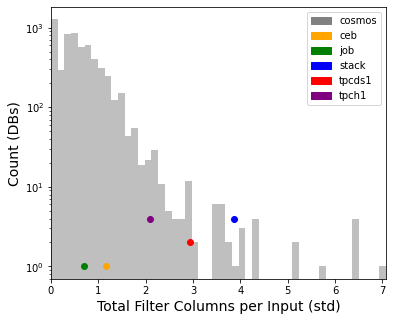

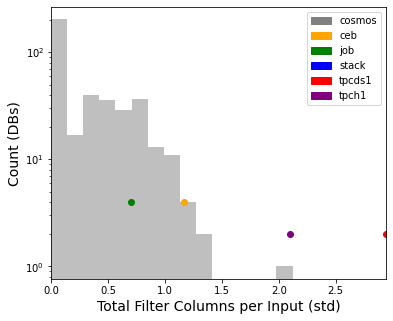

In [479]:
for p in PERCENTILES:
    plot_distribution(fcols, p, "Total Filter Columns per Input ({})".format(p), xlim=None, 
              prefix="IncludeSubqueries")
    plot_distribution(fcols1, p, "Total Filter Columns per Input ({})".format(p), xlim=None, 
          prefix="NoSubqueries")

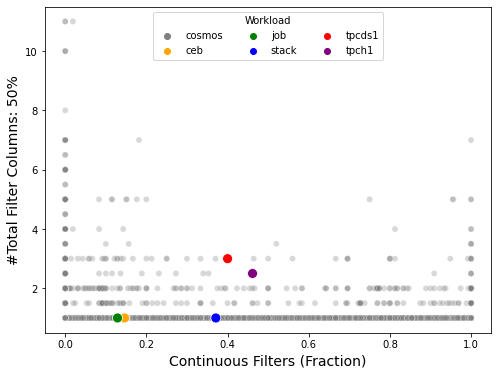

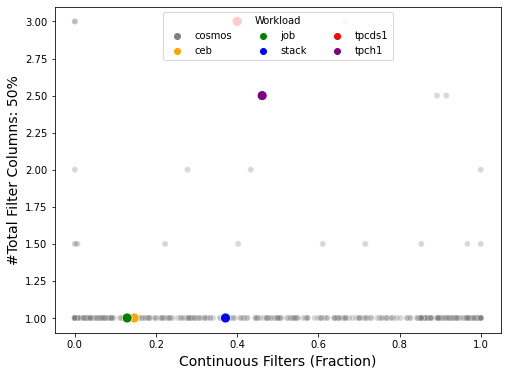

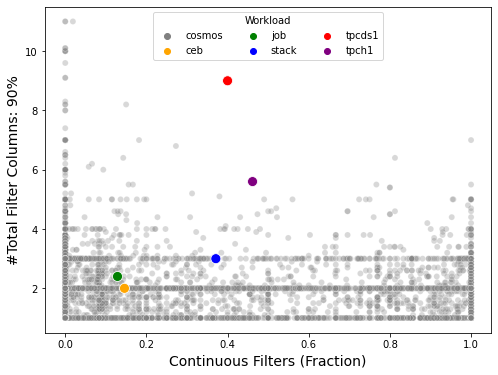

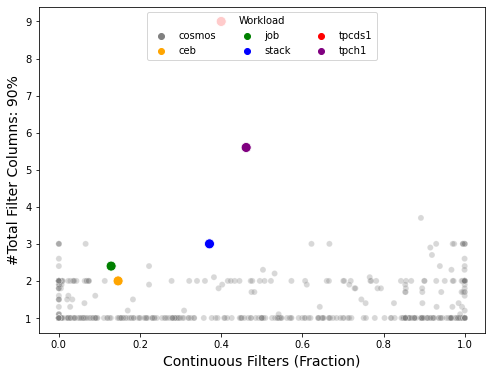

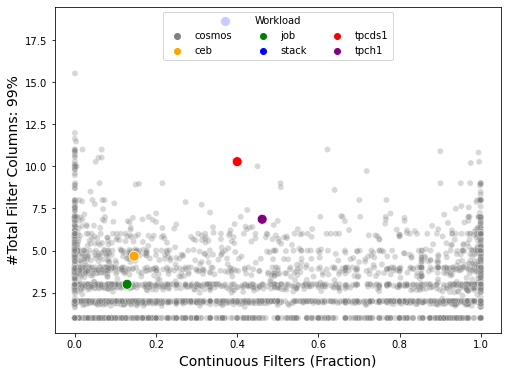

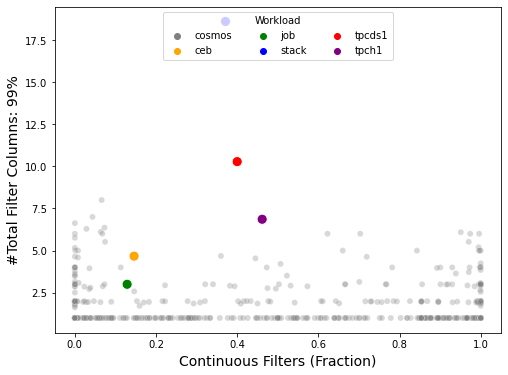

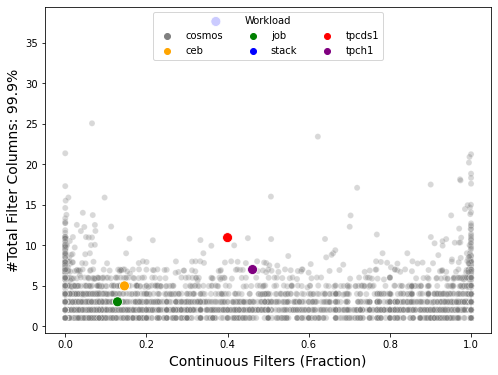

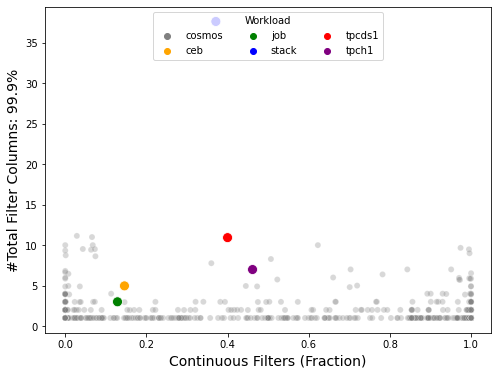

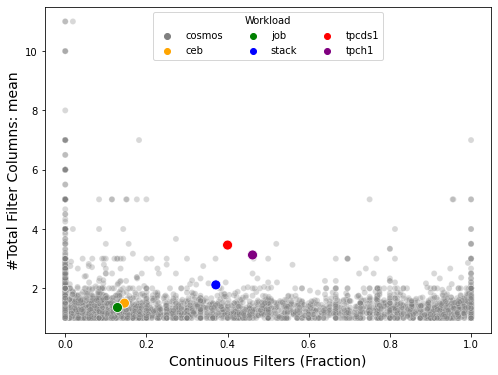

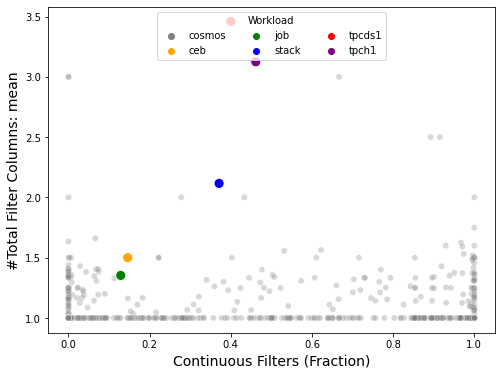

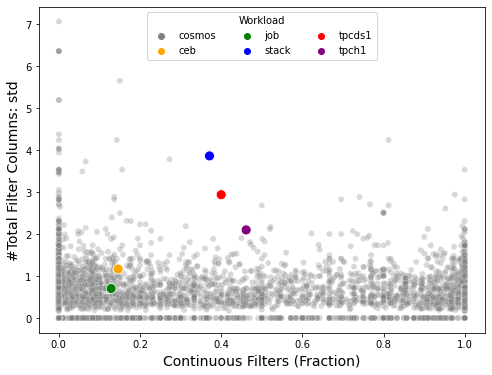

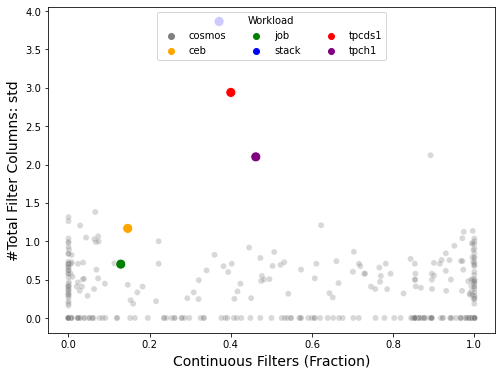

In [468]:
for p in PERCENTILES:
    plot_sel_fig(fcols, "cont_ops", p, "Continuous Filters (Fraction)", "#Total Filter Columns: " + p,
                prefix="IncludesSubqueries")
    plot_sel_fig(fcols1, "cont_ops", p, "Continuous Filters (Fraction)", "#Total Filter Columns: " + p,
            prefix="NoSubqueries")

In [251]:
# seldf = exprdf[exprdf["RowCount"] != -1]
# seldf1 = exprdf1[exprdf1["RowCount"] != -1]
# #seldf.groupby(["cluster"])["Selectivity"].describe(percentiles=[0.25,0.75, 0.90, 0.95, 0.99])
# selps = seldf.groupby(["db", "workload", "cluster"])["Selectivity"].describe(percentiles=[0.5, 0.75, 0.9, 0.99, 0.999]).reset_index()
# selps = selps[selps.db.isin(seldbs)]
# #selps.head(5)

In [252]:
seldf = exprdf[exprdf["RowCount"] != -1]
seldf1 = exprdf1[exprdf1["RowCount"] != -1]

selps = seldf.groupby(["db", "workload", "cluster"])["Selectivity"].describe(percentiles=[0.5, 0.75, 0.9, 0.99, 0.999]).reset_index()
selps = selps[selps.db.isin(seldbs)]

selps1 = seldf1.groupby(["db", "workload", "cluster"])["Selectivity"].describe(percentiles=[0.5, 0.75, 0.9, 0.99, 0.999]).reset_index()
selps1 = selps1[selps1.db.isin(seldbs1)]


In [253]:
selps = selps.merge(udf, on=["db", "workload"], how="inner")
#selps.head(5)
selps1 = selps1.merge(udf1, on=["db", "workload"], how="inner")
selps.head(5)

db workload cluster_x  count_x    mean_x     std_x  \
0               ceb      ceb       ceb  21045.0  0.304178  0.349906   
1  cosmos08-0473122   cosmos  cosmos08     15.0  0.092472  0.267218   
2  cosmos08-0473139   cosmos  cosmos08     76.0  0.014580  0.025749   
3  cosmos08-0473163   cosmos  cosmos08     46.0  0.978539  0.140593   
4  cosmos08-0473182   cosmos  cosmos08     32.0  1.000000  0.000000   

          min_x     50%_x     75%_x     90%_x       99%     99.9%     max_x  \
0  4.118765e-07  0.151789  0.428652  1.000000  1.000000  1.000000  1.000000   
1  1.614939e-10  0.000034  0.001918  0.224555  0.909938  0.990994  1.000000   
2  0.000000e+00  0.000008  0.021227  0.056183  0.100503  0.107019  0.107743   
3  4.629690e-02  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
4  1.000000e+00  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

   count_y    mean_y     std_y  min_y  50%_y  75%_y  90%_y  max_y cluster_y  \
0  17796.0  1.047426  0.226382    1.0    1.0    1.0    1.0    3.0       ceb   
1      8.0  1.500000  1.414214    1.0    1.0    1.0    2.2    5.0  cosmos08   
2     44.0  1.431818  0.661138    1.0    1.0    2.0    2.0    3.0  cosmos08   
3     46.0  1.000000  0.000000    1.0    1.0    1.0    1.0    1.0  cosmos08   
4     32.0  1.000000  0.000000    1.0    1.0    1.0    1.0    1.0  cosmos08   

   cont_ops  discrete_ops  like_ops  
0  0.145946      0.786426  0.072302  
1  0.133333      0.866667  0.000000  
2  0.000000      1.000000  0.000000  
3  0.978261      0.978261  0.000000  
4  0.000000      1.000000  0.000000

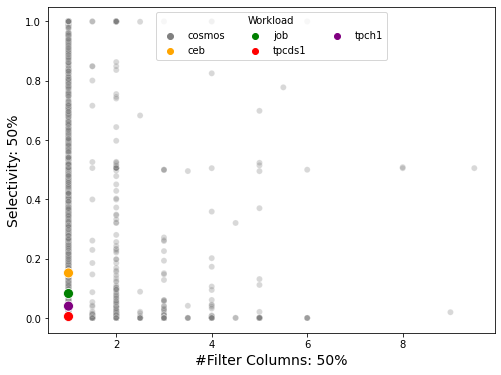

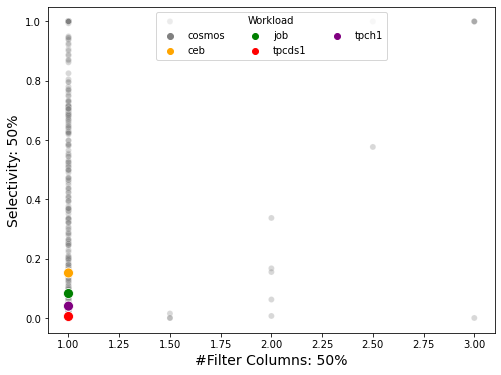

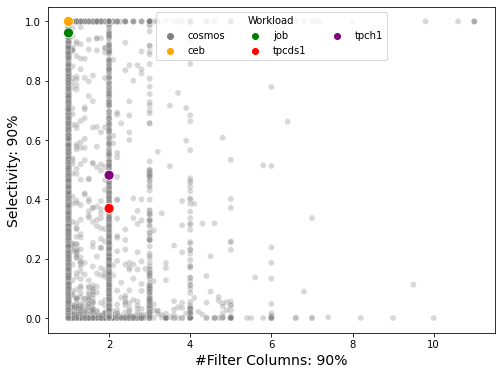

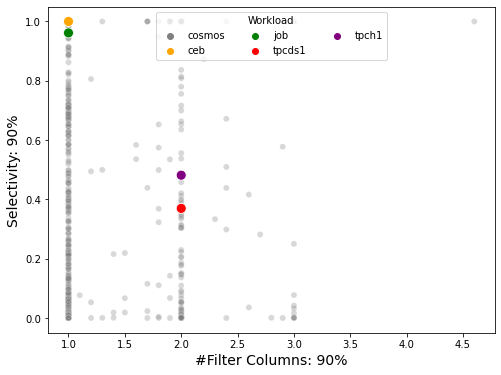

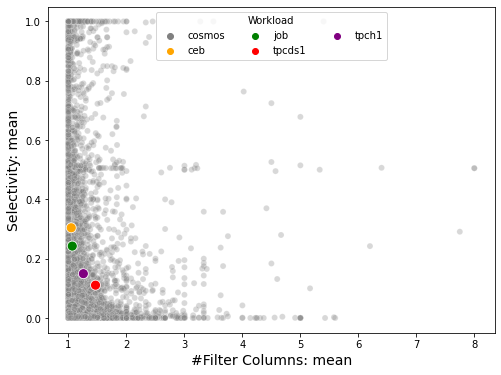

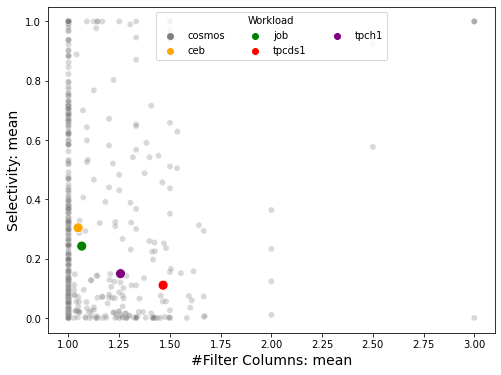

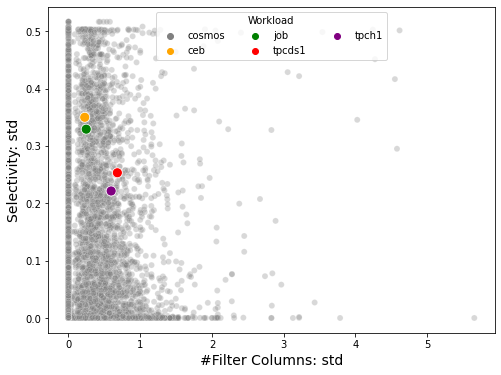

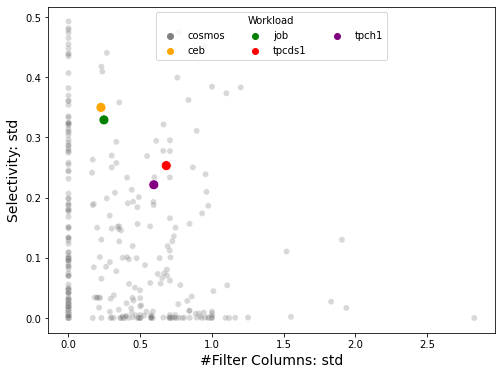

In [254]:
for p in PERCENTILES:
    plot_sel_fig(selps, p+"_y", p+"_x", "#Filter Columns: " + p, "Selectivity: " + p, 
                prefix="IncludesSubqueries")
    plot_sel_fig(selps1, p+"_y", p+"_x", "#Filter Columns: " + p, "Selectivity: " + p, 
            prefix="NoSubqueries")

In [255]:
print(len(set(selps["db"])))

6297
